# Fase 1 - Competição de Data Science - IME Jr

## Questões

1. Trate os dados.
2. Qual o post mais reagido?
3. Qual o post mais comentado?
4. Qual o post mais compartilhado?
5. Qual o post mais salvo?
6. Qual o total de saves que nosso Instagram possui?
7. Em quais post alcançamos mais usuários?
8. Em quantos dias tivemos posts?
9. Quantos posts fizemos?
10. Qual o total de usuários alcançados no nosso Instagram?
11. Qual o formato de post com mais compartilhamentos?
12. O post sobre a federação da IME Jr teve melhor performance no Instagram ou no LinkedIn?
13. Qual a média de curtidas no Instagram? E no LinkedIn?
14. Há algum post com dados esquisitos? Quais as suas hipóteses?
15. Qual mês teve mais reações?
16. Quantos e quais posts tiveram mais do que 15 comentários?
17. Quantos posts do feed não possuem comentários? E quantos stories?
18. Quantos posts no feed temos no Instagram desde 29/10/2021?
19. Quantas vezes cada post foi visto por usuário? Qual o post mais visto por usuário?
20. Qual o post com a melhor performance de reações?
21. Qual(is) dia(s) da semana temos mais reações?
22. Qual o total de impressões que os posts com criativo DiaDoDesafio tiveram?
23. Quantos likes teve nosso post da Isabelle Tamarozi? Ele foi um bom post? Por quê?
24. Qual o nome do nosso melhor story? Por quê?
25. Qual o nome do nosso melhor post? Por quê?
26. Posts que têm mais curtidas têm mais comentários também?
27. Crie uma coluna de nota para cada post. O cálculo da nota fica a seu critério.
28. Tivemos uma melhora ou piora de performance após a divulgação da novaidentidade visual? Quais hipóteses você levanta pra isso?
29. Perdemos muito engajamento com posts sequenciais?
30. Qual post deveríamos repetir?
31. Qual formato a gente deve priorizar?
32. Compare nossa performance com outra EJ.
33. Como tomador(a) de decisão, quais seriam suas estratégias pro time de Marketing?

In [1]:
# Importando bibliotecas necessárias

import pandas as pd # para importar os csv's como um DataFrame e poder manipulá-los
import seaborn as sns # para realização de alguns gráficos
import matplotlib.pyplot as plt # para realização de alguns gráficos
import statistics as sts

In [2]:
# Importando os dados

df = pd.read_csv("fase_01.csv")
df.head()

,Nome do Post,Data,Criativo,Posicionamento,Plataforma,Formato,Conteúdo,Alcance,Impressões,Saves,Cliques em Link,3-Sec-View,Visualizações 100%,Comentários,Reações,Compartilhamentos
0,Amostragem_Imagem_Feed_LinkedIn_150721,15/07/2021,Amostragem,Feed,LinkedIn,Imagem,NaN,NaN,NaN,0.0,108.0,0.0,NaN,0,15.0,0.0
1,AulõesFuvest_Imagem_Stories_Instagram_201221,20/12/2021,AulõesFuvest,Stories,Instagram,Imagem,NaN,116.0,119.0,NaN,NaN,NaN,NaN,0,NaN,1.0
2,BingoDoEstudante_Vídeo_Stories_Instagram_110821,11/08/2021,BingoDoEstudante,Stories,Instagram,Vídeo,NaN,93.0,NaN,0.0,0.0,0.0,0.0,0,0.0,0.0
3,BoaProvaFuvest_Imagem_Stories_Instagram_111221,11/12/2021,BoaProvaFuvest,Stories,Instagram,Imagem,NaN,75.0,75.0,NaN,NaN,NaN,NaN,0,NaN,0.0
4,CuriosidadesArcane(1)_Imagem_Stories_Instagram...,03/12/2021,CuriosidadesArcane(1),Stories,Instagram,Imagem,NaN,84.0,88.0,NaN,NaN,NaN,NaN,1,NaN,1.0


In [3]:
# Renomeando algumas colunas que serão úteis posteriormente
df.rename(columns = {'Nome do Post': 'Nome_do_Post', 'Cliques em Link': 'Cliques_em_Link'}, inplace = True)
df.head()

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Conteúdo,Alcance,Impressões,Saves,Cliques_em_Link,3-Sec-View,Visualizações 100%,Comentários,Reações,Compartilhamentos
0,Amostragem_Imagem_Feed_LinkedIn_150721,15/07/2021,Amostragem,Feed,LinkedIn,Imagem,NaN,NaN,NaN,0.0,108.0,0.0,NaN,0,15.0,0.0
1,AulõesFuvest_Imagem_Stories_Instagram_201221,20/12/2021,AulõesFuvest,Stories,Instagram,Imagem,NaN,116.0,119.0,NaN,NaN,NaN,NaN,0,NaN,1.0
2,BingoDoEstudante_Vídeo_Stories_Instagram_110821,11/08/2021,BingoDoEstudante,Stories,Instagram,Vídeo,NaN,93.0,NaN,0.0,0.0,0.0,0.0,0,0.0,0.0
3,BoaProvaFuvest_Imagem_Stories_Instagram_111221,11/12/2021,BoaProvaFuvest,Stories,Instagram,Imagem,NaN,75.0,75.0,NaN,NaN,NaN,NaN,0,NaN,0.0
4,CuriosidadesArcane(1)_Imagem_Stories_Instagram...,03/12/2021,CuriosidadesArcane(1),Stories,Instagram,Imagem,NaN,84.0,88.0,NaN,NaN,NaN,NaN,1,NaN,1.0


### Questão 01: Trate os dados.
#### Resposta: 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nome_do_Post        230 non-null    object 
 1   Data                230 non-null    object 
 2   Criativo            230 non-null    object 
 3   Posicionamento      230 non-null    object 
 4   Plataforma          230 non-null    object 
 5   Formato             230 non-null    object 
 6   Conteúdo            0 non-null      float64
 7   Alcance             207 non-null    float64
 8   Impressões          224 non-null    float64
 9   Saves               190 non-null    float64
 10  Cliques_em_Link     174 non-null    float64
 11  3-Sec-View          181 non-null    float64
 12  Visualizações 100%  146 non-null    float64
 13  Comentários         230 non-null    int64  
 14  Reações             190 non-null    float64
 15  Compartilhamentos   225 non-null    float64
dtypes: float

In [5]:
# Vendo os valores nas colunas '3-Sec-View' e 'Visualizações 100%', pois aparentemente ela só tem 0 e NaN
print(df['3-Sec-View'].value_counts())
print(df['Visualizações 100%'].value_counts())

0.0    181
Name: 3-Sec-View, dtype: int64
0.0    146
Name: Visualizações 100%, dtype: int64


In [6]:
# Removendo colunas "Conteúdo","3-Sec-View" e "Visualizações 100%"
df.drop(['Conteúdo', '3-Sec-View', 'Visualizações 100%'], axis = 1, inplace = True)
df.head()

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
0,Amostragem_Imagem_Feed_LinkedIn_150721,15/07/2021,Amostragem,Feed,LinkedIn,Imagem,NaN,NaN,0.0,108.0,0,15.0,0.0
1,AulõesFuvest_Imagem_Stories_Instagram_201221,20/12/2021,AulõesFuvest,Stories,Instagram,Imagem,116.0,119.0,NaN,NaN,0,NaN,1.0
2,BingoDoEstudante_Vídeo_Stories_Instagram_110821,11/08/2021,BingoDoEstudante,Stories,Instagram,Vídeo,93.0,NaN,0.0,0.0,0,0.0,0.0
3,BoaProvaFuvest_Imagem_Stories_Instagram_111221,11/12/2021,BoaProvaFuvest,Stories,Instagram,Imagem,75.0,75.0,NaN,NaN,0,NaN,0.0
4,CuriosidadesArcane(1)_Imagem_Stories_Instagram...,03/12/2021,CuriosidadesArcane(1),Stories,Instagram,Imagem,84.0,88.0,NaN,NaN,1,NaN,1.0


In [7]:
# Buscando linhas duplicadas
df[df.duplicated(['Nome_do_Post'],keep=False)]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos


`Tratando a Data`

In [8]:
# Convertendo o tipo da coluna de datas para o tipo data
df['Data'] = pd.to_datetime(df['Data'], errors = 'coerce')

In [9]:
# Chechando se há anos errados
anos = df['Data'].dt.year
anos.value_counts()

2021    213
2022     11
2024      2
2017      2
2023      1
2025      1
Name: Data, dtype: int64

In [10]:
# Olhando as linhas com o ano claramente errado
df.loc[df['Data'].dt.year.isin([2024, 2017, 2023, 2025])]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
19,DadosPopulação(6)_Vídeo_Stories_Instagram_170721,2024-07-17,DadosPopulação(6),Stories,Instagram,Video,97.0,99.0,0.0,0.0,0,0.0,0.0
69,DesafiosMatemáticos(3)_Imagem_Stories_Instagra...,2024-05-07,DesafiosMatemáticos(3),Stories,Instagram,Imagem,83.0,85.0,0.0,0.0,0,0.0,0.0
140,DiaDoVoluntário_Imagem_Feed_LinkedIn_280821,2017-08-28,DiaDoVoluntário,Feed,LinkedIn,Imagem,NaN,271.0,0.0,15.0,0,10.0,0.0
165,FraseSofiaKovalevskaya_Imagem_Feed_Instagram_0...,2023-08-03,FraseSofiaKovalevskaya,Feed,Instagram,Imagem,508.0,570.0,21.0,0.0,8,102.0,4.0
181,MotivosParaNãoSeInscrever_Imagem_Feed_Instagra...,2017-08-11,MotivosParaNãoSeInscrever,Feed,Instagram,Imagem,407.0,518.0,1.0,0.0,11,43.0,1.0
199,ReelsAlissa_Vídeo_Reels_Instagram_211121,2025-03-19,ReelsAlissa,Reels,Instagram,Vídeo,3113.0,3374.0,11.0,NaN,22,112.0,0.0


In [11]:
# Criando uma lista com o nome dos posts
nomes_posts = df['Nome_do_Post'].tolist()

In [12]:
# Criando uma lista com as datas certas dos posts, de acordo com os ultimos 6 caracteres do nome
novas_datas = []

for post in nomes_posts:
    data = post[-6::]
    novas_datas.append(data[0:2] + '/' + data[2:4] + '/' + data[4:])

In [13]:
# Subestindo as data antigas pelas datas novas e mudando novamente o tipo da coluna para o tipo data
df.iloc[:, 1] = novas_datas
df['Data'] = pd.to_datetime(df['Data'], errors = 'coerce', dayfirst = True)
df.head()

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
0,Amostragem_Imagem_Feed_LinkedIn_150721,2021-07-15,Amostragem,Feed,LinkedIn,Imagem,NaN,NaN,0.0,108.0,0,15.0,0.0
1,AulõesFuvest_Imagem_Stories_Instagram_201221,2021-12-20,AulõesFuvest,Stories,Instagram,Imagem,116.0,119.0,NaN,NaN,0,NaN,1.0
2,BingoDoEstudante_Vídeo_Stories_Instagram_110821,2021-08-11,BingoDoEstudante,Stories,Instagram,Vídeo,93.0,NaN,0.0,0.0,0,0.0,0.0
3,BoaProvaFuvest_Imagem_Stories_Instagram_111221,2021-12-11,BoaProvaFuvest,Stories,Instagram,Imagem,75.0,75.0,NaN,NaN,0,NaN,0.0
4,CuriosidadesArcane(1)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(1),Stories,Instagram,Imagem,84.0,88.0,NaN,NaN,1,NaN,1.0


In [14]:
# Vendo quantos posts há de cada ano
anos = df['Data'].dt.year
anos.value_counts()

2021    221
2022      9
Name: Data, dtype: int64

In [15]:
# Durante a análise percebi que a data da semana pré fuvest está errada no nome do post
# Portanto é preciso arrumá-la, iremos adicionar 1 ano
df.iloc[214, 1] = df.iloc[214, 1] + pd.DateOffset(years = 1)

`Tratando o Posicionamento`

In [16]:
# Olhando os valores presentes na coluna
posicionamento_group = df.groupby(['Posicionamento']).size()
posicionamento_group

Posicionamento
Fed          2
Feed        55
Reels        3
Storie       5
Stories    130
Story        9
feed         8
stories     18
dtype: int64

In [17]:
# Trocando nomes errados para os certos
df.loc[df['Posicionamento'].isin(['Fed', 'feed']), 'Posicionamento'] = 'Feed'
df.loc[df['Posicionamento'].isin(['Storie', 'Story', 'stories']), 'Posicionamento'] = 'Stories'

posicionamento_group = df.groupby(['Posicionamento']).size()

<AxesSubplot:xlabel='Posicionamento'>

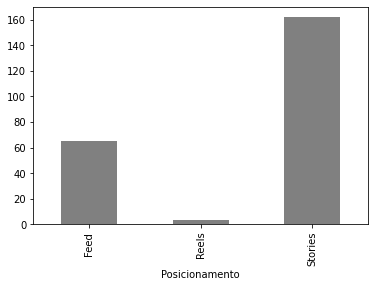

In [18]:
# Gráfico para ver distribuição do posicionamento
posicionamento_group.plot.bar(color = 'gray')

`Tratando a Plataforma`

In [19]:
# Olhando os valores presentes na coluna
plataforma_group = df.groupby(['Plataforma']).size()
plataforma_group

Plataforma
Instagram    201
LinkedIn      20
Linkedin       3
ig             6
dtype: int64

In [20]:
# Trocando nomes errados para os certos
df.loc[df['Plataforma'] == 'ig', 'Plataforma'] = 'Instagram'
df.loc[df['Plataforma'] == 'Linkedin', 'Plataforma'] = 'LinkedIn'

plataforma_group = df.groupby(['Plataforma']).size()

<AxesSubplot:xlabel='Plataforma'>

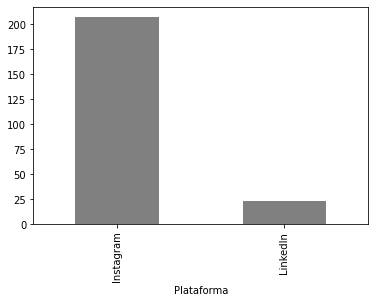

In [21]:
# Gráfico para ver distribuição da plataforma
plataforma_group.plot.bar(color = 'gray')

`Tratando o Formato`

In [22]:
# Olhando os valores presentes na coluna
formato_group = df.groupby(['Formato']).size()
formato_group

Formato
Imagem    165
Photo       1
Video       6
Vídeo      50
imagem      5
vídeo       3
dtype: int64

In [23]:
# Trocando nomes errados para os certos
df.loc[df['Formato'].isin(['imagem', 'Photo']), 'Formato'] = 'Imagem'
df.loc[df['Formato'].isin(['Video', 'vídeo']), 'Formato'] = 'Vídeo'

formato_group = df.groupby(['Formato']).size()

<AxesSubplot:xlabel='Formato'>

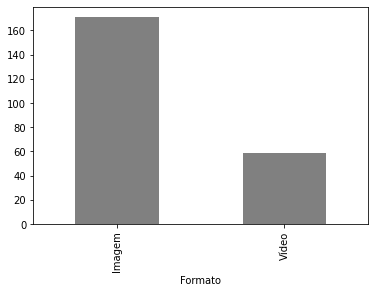

In [24]:
# Gráfico para ver distribuição do formato
formato_group.plot.bar(color = 'gray')

`Tratando o Alcance`

In [25]:
df['Alcance'].describe()

count     207.000000
mean      235.342995
std       655.949422
min         0.000000
25%        84.500000
50%       105.000000
75%       167.000000
max      6600.000000
Name: Alcance, dtype: float64

Text(0.5, 1.0, 'Alcance')

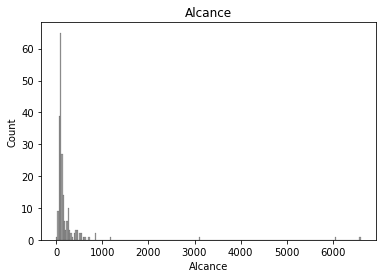

In [26]:
sns.histplot(df['Alcance'], color = "grey").set_title('Alcance')

Text(0.5, 1.0, 'Alcance')

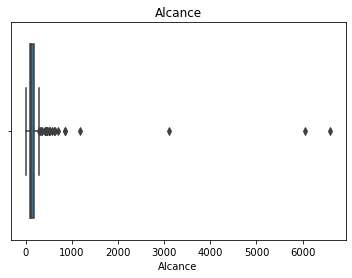

In [27]:
# Vemos que há possíveis outliers na coluna Alcance
sns.boxplot(x = df['Alcance']).set_title('Alcance')

In [28]:
# Visulizar onde o alcance é maior que o número de impressões
# algo estranho pois o alcance considera quantas contas viram o conteúdo e impressões quantas vezes ele foi visto.
# o story do dia mundial do doador de sangue tem uma impressão muito baixa e alcance mt alto, oq é quase impossível.
df.loc[(df.Alcance > df.Impressões)]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
8,CuriosidadesArcane(5)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(5),Stories,Instagram,Imagem,89.0,69.0,NaN,NaN,0,NaN,0.0
147,DiaMundiaDoadorDeSangue_Vídeo_Stories_Instagra...,2021-06-14,DiaMundiaDoadorDeSangue,Stories,Instagram,Vídeo,6600.0,67.0,0.0,0.0,1,0.0,0.0


In [29]:
# Substituir esses valores pelo número de impressões do conteúdo, considerando que cada pessoa só viu 1 vez
df.loc[8, 'Alcance' ] = 69
df.loc[147, 'Alcance' ] = 67

In [30]:
# Localizamos linhas em que o alcance é menor que 70% do número de impressões, o que seria "estranho"
df.loc[(df.Alcance) < (7*df.Impressões/10)]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
93,DesafiosMatemáticos(7)_Imagem_Stories_Instagra...,2021-06-26,DesafiosMatemáticos(7),Stories,Instagram,Imagem,75.0,760.0,0.0,0.0,0,0.0,0.0
117,DiaDoAmigo(2)_Vídeo_Stories_Instagram_200721,2021-07-20,DiaDoAmigo(2),Stories,Instagram,Vídeo,0.0,61.0,0.0,0.0,0,0.0,0.0
138,DiaDoVoluntariado_Imagem_Feed_Instagram_280821,2021-08-28,DiaDoVoluntariado,Feed,Instagram,Imagem,260.0,382.0,2.0,0.0,1,23.0,0.0
141,DiaDosNamorads_Imagem_Feed_Instagram_120621,2021-06-12,DiaDosNamorads,Feed,Instagram,Imagem,254.0,392.0,1.0,0.0,4,29.0,0.0
214,SemanaPreFuvest_Imagem_Feed_Instagram_060121,2022-01-06,SemanaPreFuvest,Feed,Instagram,Imagem,6058.0,8849.0,81.0,NaN,25,0.0,200.0


In [31]:
# Podemos substituir os valores mais "estranhos" pelo número de impressões do conteúdo, considerando que cada pessoa só viu 1 vez
# Durante a análise percebe-se que o stories DesafiosMatemáticos(7) está alcance e impressões muito maiores 
# que os outros stories de desafios matemáticos do mesmo dia, portanto vamos mudar as impressões ao invés do alcance
df.loc[93, 'Impressões' ] = 75
df.loc[117, 'Alcance' ] = 61

In [32]:
# Ver se valores de alcance mt grandes fazem sentido em comparação às outras métricas
# Conclui-se que sim, pois os outliers são posts que tiveram desemprenho acima do normal
df.loc[df.Alcance > 1000]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
199,ReelsAlissa_Vídeo_Reels_Instagram_211121,2021-11-21,ReelsAlissa,Reels,Instagram,Vídeo,3113.0,3374.0,11.0,NaN,22,112.0,0.0
200,Retrospectiva _Vídeo_Reels_Instagram_311221,2021-12-31,Retrospectiva,Reels,Instagram,Vídeo,1173.0,1280.0,8.0,NaN,14,43.0,14.0
214,SemanaPreFuvest_Imagem_Feed_Instagram_060121,2022-01-06,SemanaPreFuvest,Feed,Instagram,Imagem,6058.0,8849.0,81.0,NaN,25,0.0,200.0


In [33]:
# Procurando linhas onde o Alcance está como NaN
# Vemos que todos alcances NaN estão no LinkedIn
df[df.Alcance.isna()]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
0,Amostragem_Imagem_Feed_LinkedIn_150721,2021-07-15,Amostragem,Feed,LinkedIn,Imagem,NaN,NaN,0.0,108.0,0,15.0,0.0
105,DiaDaFamília_Imagem_Feed_LinkedIn_150521,2021-05-15,DiaDaFamília,Feed,LinkedIn,Imagem,NaN,488.0,0.0,60.0,1,22.0,0.0
107,DiaDaImunização_Imagem_Feed_LinkedIn_090621,2021-06-09,DiaDaImunização,Feed,LinkedIn,Imagem,NaN,295.0,0.0,74.0,0,14.0,0.0
119,DiaDoCliente_Imagem_Feed_LinkedIn_150921,2021-09-15,DiaDoCliente,Feed,LinkedIn,Imagem,NaN,203.0,0.0,4.0,0,9.0,0.0
132,DiaDoEstatístico_Imagem_Feed_LinkedIn_290521,2021-05-29,DiaDoEstatístico,Feed,LinkedIn,Imagem,NaN,610.0,0.0,27.0,1,28.0,1.0
134,DiaDoIBGE_Imagem_Feed_LinkedIn_060721,2021-07-06,DiaDoIBGE,Feed,LinkedIn,Imagem,NaN,239.0,0.0,94.0,0,14.0,1.0
136,DiaDoProfessor_Imagem_Feed_LinkedIn_151021,2021-10-15,DiaDoProfessor,Feed,LinkedIn,Imagem,NaN,268.0,0.0,70.0,0,10.0,1.0
140,DiaDoVoluntário_Imagem_Feed_LinkedIn_280821,2021-08-28,DiaDoVoluntário,Feed,LinkedIn,Imagem,NaN,271.0,0.0,15.0,0,10.0,0.0
149,DiaMundialEstatística_Imagem_Feed_LinkedIn_201021,2021-10-20,DiaMundialEstatística,Feed,LinkedIn,Imagem,NaN,407.0,0.0,111.0,0,14.0,0.0
154,DiaNacionalVacinação_Imagem_Feed_LinkedIn_171021,2021-10-17,DiaNacionalVacinação,Feed,LinkedIn,Imagem,NaN,356.0,0.0,65.0,0,8.0,2.0


In [34]:
# Vemos que não há nenhuma publicação do LinkedIn em que o Alcance é diferente de NaN
df[(~df.Alcance.isna()) & (df.Plataforma == 'LinkedIn')]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos


In [35]:
# Portanto podemos mudar os NaN do alcance do LinkedIn para o número de impressões do post
# Em seguida vemos que resta 1 NaN no Alcance, o trataremos adiante
df.loc[df.Alcance.isna(), 'Alcance'] = df['Impressões']
df[df.Plataforma == 'LinkedIn']

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
0,Amostragem_Imagem_Feed_LinkedIn_150721,2021-07-15,Amostragem,Feed,LinkedIn,Imagem,NaN,NaN,0.0,108.0,0,15.0,0.0
105,DiaDaFamília_Imagem_Feed_LinkedIn_150521,2021-05-15,DiaDaFamília,Feed,LinkedIn,Imagem,488.0,488.0,0.0,60.0,1,22.0,0.0
107,DiaDaImunização_Imagem_Feed_LinkedIn_090621,2021-06-09,DiaDaImunização,Feed,LinkedIn,Imagem,295.0,295.0,0.0,74.0,0,14.0,0.0
119,DiaDoCliente_Imagem_Feed_LinkedIn_150921,2021-09-15,DiaDoCliente,Feed,LinkedIn,Imagem,203.0,203.0,0.0,4.0,0,9.0,0.0
132,DiaDoEstatístico_Imagem_Feed_LinkedIn_290521,2021-05-29,DiaDoEstatístico,Feed,LinkedIn,Imagem,610.0,610.0,0.0,27.0,1,28.0,1.0
134,DiaDoIBGE_Imagem_Feed_LinkedIn_060721,2021-07-06,DiaDoIBGE,Feed,LinkedIn,Imagem,239.0,239.0,0.0,94.0,0,14.0,1.0
136,DiaDoProfessor_Imagem_Feed_LinkedIn_151021,2021-10-15,DiaDoProfessor,Feed,LinkedIn,Imagem,268.0,268.0,0.0,70.0,0,10.0,1.0
140,DiaDoVoluntário_Imagem_Feed_LinkedIn_280821,2021-08-28,DiaDoVoluntário,Feed,LinkedIn,Imagem,271.0,271.0,0.0,15.0,0,10.0,0.0
149,DiaMundialEstatística_Imagem_Feed_LinkedIn_201021,2021-10-20,DiaMundialEstatística,Feed,LinkedIn,Imagem,407.0,407.0,0.0,111.0,0,14.0,0.0
154,DiaNacionalVacinação_Imagem_Feed_LinkedIn_171021,2021-10-17,DiaNacionalVacinação,Feed,LinkedIn,Imagem,356.0,356.0,0.0,65.0,0,8.0,2.0


In [36]:
df['Alcance'].describe()

count     229.000000
mean      212.694323
std       460.444554
min        39.000000
25%        87.000000
50%       110.000000
75%       229.000000
max      6058.000000
Name: Alcance, dtype: float64

`Tratando as Impressões`

In [37]:
# Impressões
df['Impressões'].describe()

count     224.000000
mean      244.566964
std       641.910276
min        39.000000
25%        87.750000
50%       111.500000
75%       240.750000
max      8849.000000
Name: Impressões, dtype: float64

Text(0.5, 1.0, 'Impressões')

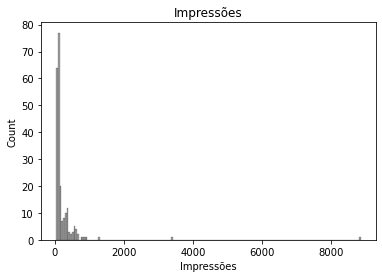

In [38]:
sns.histplot(df['Impressões'], color = "grey").set_title('Impressões')

Text(0.5, 1.0, 'Impressões')

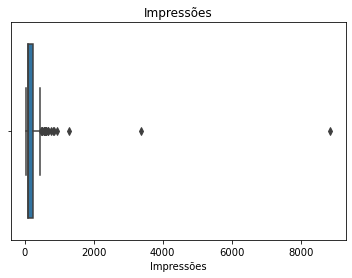

In [39]:
sns.boxplot(x = df['Impressões']).set_title('Impressões')

In [40]:
# Vendo onde o numero de impressões é maior que 1000, valores mt altos
# Tudo parece ok, etá de acordo com o andamento do post comparando com o alcance
df.loc[(df.Impressões > 1000)]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
199,ReelsAlissa_Vídeo_Reels_Instagram_211121,2021-11-21,ReelsAlissa,Reels,Instagram,Vídeo,3113.0,3374.0,11.0,NaN,22,112.0,0.0
200,Retrospectiva _Vídeo_Reels_Instagram_311221,2021-12-31,Retrospectiva,Reels,Instagram,Vídeo,1173.0,1280.0,8.0,NaN,14,43.0,14.0
214,SemanaPreFuvest_Imagem_Feed_Instagram_060121,2022-01-06,SemanaPreFuvest,Feed,Instagram,Imagem,6058.0,8849.0,81.0,NaN,25,0.0,200.0


In [41]:
# Buscando NaN nas impressoes (há 1 no linkedin e 5 no instagram)
df[df.Impressões.isna()]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
0,Amostragem_Imagem_Feed_LinkedIn_150721,2021-07-15,Amostragem,Feed,LinkedIn,Imagem,NaN,NaN,0.0,108.0,0,15.0,0.0
2,BingoDoEstudante_Vídeo_Stories_Instagram_110821,2021-08-11,BingoDoEstudante,Stories,Instagram,Vídeo,93.0,NaN,0.0,0.0,0,0.0,0.0
36,DesafioSobreIME(5)_Imagem_Stories_Instagram_04...,2021-06-04,DesafioSobreIME(5),Stories,Instagram,Imagem,144.0,NaN,0.0,0.0,0,0.0,0.0
54,DesafiosIMEJr(5)_Vídeo_Stories_Instagram_171021,2021-10-17,DesafiosIMEJr(5),Stories,Instagram,Vídeo,96.0,NaN,0.0,0.0,0,0.0,0.0
131,DiaDoEstatistics_Imagem_Feed_Instagram_290521,2021-05-29,DiaDoEstatistics,Feed,Instagram,Imagem,310.0,NaN,0.0,0.0,12,53.0,18.0
175,InscriçãoFinalizada_Imagem_Feed_Instagram_160921,2021-09-16,InscriçãoFinalizada,Feed,Instagram,Imagem,209.0,NaN,1.0,0.0,8,21.0,0.0


In [42]:
# Criando um dataframe somente com as linhas de dados do linkedin
df_linkedin = df.loc[(df.Plataforma == 'LinkedIn')]
df_linkedin.head()

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
0,Amostragem_Imagem_Feed_LinkedIn_150721,2021-07-15,Amostragem,Feed,LinkedIn,Imagem,NaN,NaN,0.0,108.0,0,15.0,0.0
105,DiaDaFamília_Imagem_Feed_LinkedIn_150521,2021-05-15,DiaDaFamília,Feed,LinkedIn,Imagem,488.0,488.0,0.0,60.0,1,22.0,0.0
107,DiaDaImunização_Imagem_Feed_LinkedIn_090621,2021-06-09,DiaDaImunização,Feed,LinkedIn,Imagem,295.0,295.0,0.0,74.0,0,14.0,0.0
119,DiaDoCliente_Imagem_Feed_LinkedIn_150921,2021-09-15,DiaDoCliente,Feed,LinkedIn,Imagem,203.0,203.0,0.0,4.0,0,9.0,0.0
132,DiaDoEstatístico_Imagem_Feed_LinkedIn_290521,2021-05-29,DiaDoEstatístico,Feed,LinkedIn,Imagem,610.0,610.0,0.0,27.0,1,28.0,1.0


In [43]:
# O post do linkedin com a impressão NaN tem 108 cliques em link e 15 reações
# então vamos procurar outras publicações do linkedin com desempenho parecido
df_linkedin.loc[(df_linkedin.Cliques_em_Link > 90) & (df_linkedin.Reações > 10)]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
0,Amostragem_Imagem_Feed_LinkedIn_150721,2021-07-15,Amostragem,Feed,LinkedIn,Imagem,NaN,NaN,0.0,108.0,0,15.0,0.0
134,DiaDoIBGE_Imagem_Feed_LinkedIn_060721,2021-07-06,DiaDoIBGE,Feed,LinkedIn,Imagem,239.0,239.0,0.0,94.0,0,14.0,1.0
149,DiaMundialEstatística_Imagem_Feed_LinkedIn_201021,2021-10-20,DiaMundialEstatística,Feed,LinkedIn,Imagem,407.0,407.0,0.0,111.0,0,14.0,0.0


In [44]:
# O post de 'amostragem' com impreessão NaN parece muito com o do 'dia muldial da estatística
# então pode-se considerar nas impressões um valor muito próximo de 407
df.loc[0, 'Impressões'] = 400
# Como neste caso o alcance também está NaN, também atribuiremos o valor 400 para ele
df.loc[0, 'Alcance'] = 400

In [45]:
# Criando um dataframe somente com as linhas de dados do instagram
df_instagram = df.loc[(df.Plataforma == 'Instagram')]
df_instagram.head()

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
1,AulõesFuvest_Imagem_Stories_Instagram_201221,2021-12-20,AulõesFuvest,Stories,Instagram,Imagem,116.0,119.0,NaN,NaN,0,NaN,1.0
2,BingoDoEstudante_Vídeo_Stories_Instagram_110821,2021-08-11,BingoDoEstudante,Stories,Instagram,Vídeo,93.0,NaN,0.0,0.0,0,0.0,0.0
3,BoaProvaFuvest_Imagem_Stories_Instagram_111221,2021-12-11,BoaProvaFuvest,Stories,Instagram,Imagem,75.0,75.0,NaN,NaN,0,NaN,0.0
4,CuriosidadesArcane(1)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(1),Stories,Instagram,Imagem,84.0,88.0,NaN,NaN,1,NaN,1.0
5,CuriosidadesArcane(2)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(2),Stories,Instagram,Imagem,78.0,79.0,NaN,NaN,1,NaN,0.0


In [46]:
# Vamos substituir as impressões NaN do instagram pelo número do alcance
# considerando que cada conta viu o conteúdo uma única vez
df.loc[2, 'Impressões'] = 93
df.loc[36, 'Impressões'] = 144
df.loc[54, 'Impressões'] = 96
df.loc[131, 'Impressões'] = 310
df.loc[175, 'Impressões'] = 209

In [47]:
# Verificando se todos os NaN's das impressões foram tratados
df.loc[df.Impressões.isna()]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos


In [48]:
# Agora que já tratamos todos os NaN's, vamos verificar outliers
# Apesar de serem outliers, nada será feito pois são posts que tiveram naturalmente um desempenho maior que o dos outros
df.loc[df['Impressões'] > 1000]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
199,ReelsAlissa_Vídeo_Reels_Instagram_211121,2021-11-21,ReelsAlissa,Reels,Instagram,Vídeo,3113.0,3374.0,11.0,NaN,22,112.0,0.0
200,Retrospectiva _Vídeo_Reels_Instagram_311221,2021-12-31,Retrospectiva,Reels,Instagram,Vídeo,1173.0,1280.0,8.0,NaN,14,43.0,14.0
214,SemanaPreFuvest_Imagem_Feed_Instagram_060121,2022-01-06,SemanaPreFuvest,Feed,Instagram,Imagem,6058.0,8849.0,81.0,NaN,25,0.0,200.0


In [49]:
df['Impressões'].describe()

count     230.000000
mean      243.630435
std       633.736909
min        39.000000
25%        88.000000
50%       112.500000
75%       244.250000
max      8849.000000
Name: Impressões, dtype: float64

`Tratando os Salvos`

In [50]:
# Saves
df['Saves'].describe()

count    190.000000
mean       1.400000
std        6.577016
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       81.000000
Name: Saves, dtype: float64

Text(0.5, 1.0, 'Saves')

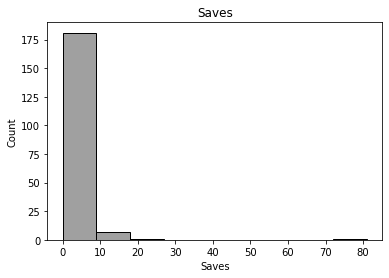

In [51]:
sns.histplot(df['Saves'], color = "grey").set_title('Saves')

In [52]:
# Verificamos saves fora do padrão, porém, eles correspondem a posts com bom desempenho, logo não precisam ser tratados
df[df['Saves'] >= 9]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
135,DiaDoProfessor_Imagem_Feed_Instagram_151021,2021-10-15,DiaDoProfessor,Feed,Instagram,Imagem,441.0,591.0,16.0,44562.0,28,91.0,8.0
148,DiaMundialEstatística_Imagem_Feed_Instagram_20...,2021-10-20,DiaMundialEstatística,Feed,Instagram,Imagem,508.0,685.0,12.0,0.0,15,88.0,1.0
153,DiaNacionalVacinação_Imagem_Feed_Instagram_171021,2021-10-17,DiaNacionalVacinação,Feed,Instagram,Imagem,418.0,586.0,10.0,0.0,11,76.0,2.0
160,FraseEstatistica_Imagem_Feed_Instagram_281221,2021-12-28,FraseEstatistica,Feed,Instagram,Imagem,556.0,620.0,13.0,NaN,1,71.0,11.0
163,FraseMatemátics_Imagem_Feed_Instagram_291121,2021-11-29,FraseMatemátics,Feed,Instagram,Imagem,431.0,493.0,15.0,NaN,3,74.0,1.0
165,FraseSofiaKovalevskaya_Imagem_Feed_Instagram_0...,2021-10-06,FraseSofiaKovalevskaya,Feed,Instagram,Imagem,508.0,570.0,21.0,0.0,8,102.0,4.0
199,ReelsAlissa_Vídeo_Reels_Instagram_211121,2021-11-21,ReelsAlissa,Reels,Instagram,Vídeo,3113.0,3374.0,11.0,NaN,22,112.0,0.0
214,SemanaPreFuvest_Imagem_Feed_Instagram_060121,2022-01-06,SemanaPreFuvest,Feed,Instagram,Imagem,6058.0,8849.0,81.0,NaN,25,0.0,200.0
217,SorteioValePresente_Imagem_Feed_Instagram_291021,2021-10-29,SorteioValePresente,Feed,Instagram,Imagem,530.0,618.0,13.0,0.0,369,94.0,11.0


In [53]:
# Verificamos que todos os posts com NaN nos saves são de stories do stories, pois não é possível salvar um story
df[df.Saves.isna()]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
1,AulõesFuvest_Imagem_Stories_Instagram_201221,2021-12-20,AulõesFuvest,Stories,Instagram,Imagem,116.0,119.0,NaN,NaN,0,NaN,1.0
3,BoaProvaFuvest_Imagem_Stories_Instagram_111221,2021-12-11,BoaProvaFuvest,Stories,Instagram,Imagem,75.0,75.0,NaN,NaN,0,NaN,0.0
4,CuriosidadesArcane(1)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(1),Stories,Instagram,Imagem,84.0,88.0,NaN,NaN,1,NaN,1.0
5,CuriosidadesArcane(2)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(2),Stories,Instagram,Imagem,78.0,79.0,NaN,NaN,1,NaN,0.0
6,CuriosidadesArcane(3)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(3),Stories,Instagram,Imagem,73.0,73.0,NaN,NaN,0,NaN,0.0
7,CuriosidadesArcane(4)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(4),Stories,Instagram,Imagem,71.0,71.0,NaN,NaN,0,NaN,0.0
8,CuriosidadesArcane(5)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(5),Stories,Instagram,Imagem,69.0,69.0,NaN,NaN,0,NaN,0.0
9,CuriosidadesArcane(6)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(6),Stories,Instagram,Imagem,68.0,68.0,NaN,NaN,0,NaN,0.0
10,CuriosidadesEmilyInParis(1)_Imagem_Stories_Ins...,2022-01-04,CuriosidadesEmilyInParis(1),Stories,Instagram,Imagem,106.0,106.0,NaN,NaN,0,NaN,0.0
11,CuriosidadesEmilyInParis(2)_Imagem_Stories_Ins...,2022-01-04,CuriosidadesEmilyInParis(2),Stories,Instagram,Imagem,101.0,101.0,NaN,NaN,0,NaN,0.0


In [54]:
# Trocamos todos os NaN's por 0
df['Saves'].fillna(0, inplace = True)

In [55]:
# Estatósticas dos dados tratados
df['Saves'].describe()

count    230.000000
mean       1.156522
std        5.998677
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       81.000000
Name: Saves, dtype: float64

`Tratando os Cliques em Link`

In [56]:
# Cliques em Link
df['Cliques_em_Link'].describe()

count      174.000000
mean       261.735632
std       3377.858733
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      44562.000000
Name: Cliques_em_Link, dtype: float64

Text(0.5, 1.0, 'Cliques em Link')

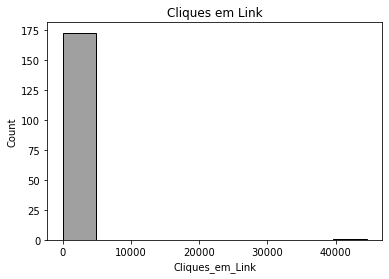

In [57]:
sns.histplot(df['Cliques_em_Link'], color = "grey").set_title('Cliques em Link')

In [58]:
# Verificamos cliques em link acima de 0 no instagram
df[(df['Cliques_em_Link'] > 0) & (df['Plataforma'] == 'Instagram')]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
135,DiaDoProfessor_Imagem_Feed_Instagram_151021,2021-10-15,DiaDoProfessor,Feed,Instagram,Imagem,441.0,591.0,16.0,44562.0,28,91.0,8.0
169,HistoriaDsMatematicsThomasBayes(3)_Imagem_Feed...,2021-05-21,HistoriaDsMatematicsThomasBayes(3),Feed,Instagram,Imagem,285.0,387.0,0.0,10.0,0,34.0,2.0
177,IsabelleTamarozi(1)_Imagem_Feed_Instagram_280721,2021-07-28,IsabelleTamarozi(1),Feed,Instagram,Imagem,279.0,362.0,1.0,13.0,0,460.0,2.0
211,SemanaPreFuvest(3)_Imagem_Stories_Instagram_11...,2022-01-11,SemanaPreFuvest(3),Stories,Instagram,Imagem,121.0,125.0,0.0,8.0,0,NaN,1.0
212,SemanaPreFuvest(4)_Imagem_Stories_Instagram_12...,2022-01-12,SemanaPreFuvest(4),Stories,Instagram,Imagem,104.0,104.0,0.0,3.0,0,NaN,0.0
218,Vale-Presente(1)_Imagem_Stories_Instagram_031121,2021-11-03,Vale-Presente(1),Stories,Instagram,Imagem,86.0,87.0,0.0,6.0,0,NaN,0.0
219,Vale-Presente(2)_Imagem_Stories_Instagram_081121,2021-11-08,Vale-Presente(2),Stories,Instagram,Imagem,105.0,105.0,0.0,3.0,0,NaN,0.0


In [59]:
# De 207 conteúdos que temos do instagram somente 7 tem cliques em link diferente de 0
# Portanto podemos preencher o outlier da linha de index 135 por 0
df.loc[135, 'Cliques_em_Link'] = 0

In [60]:
# Não há posts no linkedin com 0 cliques em link
df[(df['Cliques_em_Link'] == 0) & (df['Plataforma'] == 'LinkedIn')]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos


In [61]:
# Analisando estatísticas dos cliques em link do linkedin
# Os valores mínimo e máximo estão ok, assim como média e mediana.
df_linkedin['Cliques_em_Link'].describe()

count     23.000000
mean      40.739130
std       35.280973
min        2.000000
25%       14.000000
50%       27.000000
75%       67.500000
max      111.000000
Name: Cliques_em_Link, dtype: float64

In [62]:
# Buscando NaN's nos cliques em link
df[df.Cliques_em_Link.isna()]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
1,AulõesFuvest_Imagem_Stories_Instagram_201221,2021-12-20,AulõesFuvest,Stories,Instagram,Imagem,116.0,119.0,0.0,NaN,0,NaN,1.0
3,BoaProvaFuvest_Imagem_Stories_Instagram_111221,2021-12-11,BoaProvaFuvest,Stories,Instagram,Imagem,75.0,75.0,0.0,NaN,0,NaN,0.0
4,CuriosidadesArcane(1)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(1),Stories,Instagram,Imagem,84.0,88.0,0.0,NaN,1,NaN,1.0
5,CuriosidadesArcane(2)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(2),Stories,Instagram,Imagem,78.0,79.0,0.0,NaN,1,NaN,0.0
6,CuriosidadesArcane(3)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(3),Stories,Instagram,Imagem,73.0,73.0,0.0,NaN,0,NaN,0.0
7,CuriosidadesArcane(4)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(4),Stories,Instagram,Imagem,71.0,71.0,0.0,NaN,0,NaN,0.0
8,CuriosidadesArcane(5)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(5),Stories,Instagram,Imagem,69.0,69.0,0.0,NaN,0,NaN,0.0
9,CuriosidadesArcane(6)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(6),Stories,Instagram,Imagem,68.0,68.0,0.0,NaN,0,NaN,0.0
10,CuriosidadesEmilyInParis(1)_Imagem_Stories_Ins...,2022-01-04,CuriosidadesEmilyInParis(1),Stories,Instagram,Imagem,106.0,106.0,0.0,NaN,0,NaN,0.0
11,CuriosidadesEmilyInParis(2)_Imagem_Stories_Ins...,2022-01-04,CuriosidadesEmilyInParis(2),Stories,Instagram,Imagem,101.0,101.0,0.0,NaN,0,NaN,0.0


In [63]:
# Todos os NaN's estão no Instagram, em que a maioria dos conteúdos tem 0 cliques em link
df.loc[(df.Cliques_em_Link.isna()) & ~(df['Plataforma'] == 'Instagram')]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos


In [64]:
# Logo, substituiremos os valores faltante por 0.
df['Cliques_em_Link'].fillna(0, inplace = True)

In [65]:
df['Cliques_em_Link'].describe()

count    230.000000
mean       4.260870
std       16.423482
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      111.000000
Name: Cliques_em_Link, dtype: float64

`Tratando Comentários`

In [66]:
df['Comentários'].describe()

count    230.000000
mean       3.456522
std       25.167827
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max      369.000000
Name: Comentários, dtype: float64

Text(0.5, 1.0, 'Comentários')

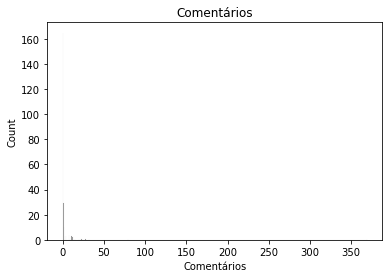

In [67]:
sns.histplot(df['Comentários'], color = "grey").set_title('Comentários')

In [68]:
df[df['Comentários'] > 1]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
38,DesafioSobreIME(7_Imagem_Stories_Instagram_040621,2021-06-04,DesafioSobreIME(7,Stories,Instagram,Imagem,134.0,135.0,0.0,0.0,2,0.0,0.0
104,DiaDaFamília_Imagem_Feed_Instagram_150521,2021-05-15,DiaDaFamília,Feed,Instagram,Imagem,450.0,555.0,1.0,0.0,20,45.0,13.0
114,DiaDasMulheresNaMatemática_Imagem_Feed_Instagr...,2021-05-12,DiaDasMulheresNaMatemática,Feed,Instagram,Imagem,460.0,551.0,1.0,0.0,9,95.0,21.0
130,DiaDoEstagiário_Vídeo_Stories_Instagram_180821,2021-08-18,DiaDoEstagiário,Stories,Instagram,Vídeo,84.0,85.0,0.0,0.0,3,0.0,0.0
131,DiaDoEstatistics_Imagem_Feed_Instagram_290521,2021-05-29,DiaDoEstatistics,Feed,Instagram,Imagem,310.0,310.0,0.0,0.0,12,53.0,18.0
135,DiaDoProfessor_Imagem_Feed_Instagram_151021,2021-10-15,DiaDoProfessor,Feed,Instagram,Imagem,441.0,591.0,16.0,0.0,28,91.0,8.0
139,DiaDoVoluntariado_Vídeo_Stories_Instagram_280821,2021-08-28,DiaDoVoluntariado,Stories,Instagram,Vídeo,52.0,53.0,0.0,0.0,2,0.0,0.0
141,DiaDosNamorads_Imagem_Feed_Instagram_120621,2021-06-12,DiaDosNamorads,Feed,Instagram,Imagem,254.0,392.0,1.0,0.0,4,29.0,0.0
148,DiaMundialEstatística_Imagem_Feed_Instagram_20...,2021-10-20,DiaMundialEstatística,Feed,Instagram,Imagem,508.0,685.0,12.0,0.0,15,88.0,1.0
150,DiaMusicistas_Imagem_Reels_Instagram_221121,2021-11-22,DiaMusicistas,Reels,Instagram,Imagem,838.0,849.0,7.0,0.0,79,79.0,0.0


In [69]:
# Olhando no Instagram da IME JR é possível corrigir onde o número de comentários está errado
# Índices 150, 165, 217
df.loc[150, 'Comentários'] = 29
df.loc[165, 'Comentários'] = 0 # obs: as métricas desse post parecem estar todas erradas, ele n teve um desempenho tão bom
df.loc[217, 'Comentários'] = 429

In [70]:
# Achando valores NaN
df[df.Comentários.isna()]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos


In [71]:
df['Comentários'].describe()

count    230.000000
mean       3.465217
std       28.610868
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max      429.000000
Name: Comentários, dtype: float64

`Tratando as Reações`

In [72]:
# Reações
df['Reações'].describe()

count      190.000000
mean       552.326316
std       7254.194809
min          0.000000
25%          0.000000
50%          0.000000
75%         20.250000
max      99999.000000
Name: Reações, dtype: float64

In [73]:
df[df['Reações'] > 50]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
109,DiaDaPizza(2)_Vídeo_Stories_Instagram_100721,2021-07-10,DiaDaPizza(2),Stories,Instagram,Vídeo,70.0,70.0,0.0,0.0,0,99999.0,0.0
114,DiaDasMulheresNaMatemática_Imagem_Feed_Instagr...,2021-05-12,DiaDasMulheresNaMatemática,Feed,Instagram,Imagem,460.0,551.0,1.0,0.0,9,95.0,21.0
131,DiaDoEstatistics_Imagem_Feed_Instagram_290521,2021-05-29,DiaDoEstatistics,Feed,Instagram,Imagem,310.0,310.0,0.0,0.0,12,53.0,18.0
135,DiaDoProfessor_Imagem_Feed_Instagram_151021,2021-10-15,DiaDoProfessor,Feed,Instagram,Imagem,441.0,591.0,16.0,0.0,28,91.0,8.0
148,DiaMundialEstatística_Imagem_Feed_Instagram_20...,2021-10-20,DiaMundialEstatística,Feed,Instagram,Imagem,508.0,685.0,12.0,0.0,15,88.0,1.0
150,DiaMusicistas_Imagem_Reels_Instagram_221121,2021-11-22,DiaMusicistas,Reels,Instagram,Imagem,838.0,849.0,7.0,0.0,29,79.0,0.0
153,DiaNacionalVacinação_Imagem_Feed_Instagram_171021,2021-10-17,DiaNacionalVacinação,Feed,Instagram,Imagem,418.0,586.0,10.0,0.0,11,76.0,2.0
159,FotoConfraternização_Imagem_Feed_Instagram_211221,2021-12-21,FotoConfraternização,Feed,Instagram,Imagem,838.0,945.0,8.0,0.0,23,119.0,19.0
160,FraseEstatistica_Imagem_Feed_Instagram_281221,2021-12-28,FraseEstatistica,Feed,Instagram,Imagem,556.0,620.0,13.0,0.0,1,71.0,11.0
163,FraseMatemátics_Imagem_Feed_Instagram_291121,2021-11-29,FraseMatemátics,Feed,Instagram,Imagem,431.0,493.0,15.0,0.0,3,74.0,1.0


In [74]:
# As linhas que parecem ter valores errados são as de índice 109, 165, 177, 188, 217
# Vamos arrumá-las olhando os valores corretos no instagram
df.loc[109, 'Reações'] = 38
df.loc[165, 'Reações'] = 46
df.loc[177, 'Reações'] = 48
df.loc[188, 'Reações'] = 25
df.loc[217, 'Reações'] = 107

In [75]:
# Vendo onde as reações são 0 (sem contar nos stories, pois é comum stories com 0 reações)
df[(df['Reações'] == 0) & ~(df['Posicionamento'] == 'Stories')]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
214,SemanaPreFuvest_Imagem_Feed_Instagram_060121,2022-01-06,SemanaPreFuvest,Feed,Instagram,Imagem,6058.0,8849.0,81.0,0.0,25,0.0,200.0


In [76]:
# Vendo o valor real das curtidas no instagram e substituindo pelo valor real
df.loc[214, 'Reações'] = 196

In [77]:
# Achando valores NaN
df[df.Reações.isna()]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
1,AulõesFuvest_Imagem_Stories_Instagram_201221,2021-12-20,AulõesFuvest,Stories,Instagram,Imagem,116.0,119.0,0.0,0.0,0,NaN,1.0
3,BoaProvaFuvest_Imagem_Stories_Instagram_111221,2021-12-11,BoaProvaFuvest,Stories,Instagram,Imagem,75.0,75.0,0.0,0.0,0,NaN,0.0
4,CuriosidadesArcane(1)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(1),Stories,Instagram,Imagem,84.0,88.0,0.0,0.0,1,NaN,1.0
5,CuriosidadesArcane(2)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(2),Stories,Instagram,Imagem,78.0,79.0,0.0,0.0,1,NaN,0.0
6,CuriosidadesArcane(3)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(3),Stories,Instagram,Imagem,73.0,73.0,0.0,0.0,0,NaN,0.0
7,CuriosidadesArcane(4)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(4),Stories,Instagram,Imagem,71.0,71.0,0.0,0.0,0,NaN,0.0
8,CuriosidadesArcane(5)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(5),Stories,Instagram,Imagem,69.0,69.0,0.0,0.0,0,NaN,0.0
9,CuriosidadesArcane(6)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(6),Stories,Instagram,Imagem,68.0,68.0,0.0,0.0,0,NaN,0.0
10,CuriosidadesEmilyInParis(1)_Imagem_Stories_Ins...,2022-01-04,CuriosidadesEmilyInParis(1),Stories,Instagram,Imagem,106.0,106.0,0.0,0.0,0,NaN,0.0
11,CuriosidadesEmilyInParis(2)_Imagem_Stories_Ins...,2022-01-04,CuriosidadesEmilyInParis(2),Stories,Instagram,Imagem,101.0,101.0,0.0,0.0,0,NaN,0.0


In [78]:
# Todas as reações NaN estão nos stories do instragram
# Podemos então substituir os NaN por 0, pois a maioria dos stories não tem reação
df['Reações'].fillna(0, inplace = True)

In [79]:
df['Reações'].describe()

count    230.000000
mean      12.382609
std       26.264886
min        0.000000
25%        0.000000
50%        0.000000
75%       12.750000
max      196.000000
Name: Reações, dtype: float64

`Tratando os Compartilhamentos`

In [80]:
# Compartilhamentos
df['Compartilhamentos'].describe()

count    225.000000
mean       2.155556
std       15.095463
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      200.000000
Name: Compartilhamentos, dtype: float64

Text(0.5, 1.0, 'Compartilhamentos')

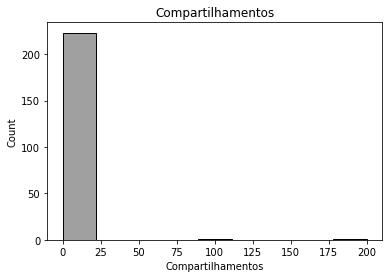

In [81]:
sns.histplot(df['Compartilhamentos'], color = "grey").set_title('Compartilhamentos')

In [82]:
df[df['Compartilhamentos'] > 10]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
104,DiaDaFamília_Imagem_Feed_Instagram_150521,2021-05-15,DiaDaFamília,Feed,Instagram,Imagem,450.0,555.0,1.0,0.0,20,45.0,13.0
114,DiaDasMulheresNaMatemática_Imagem_Feed_Instagr...,2021-05-12,DiaDasMulheresNaMatemática,Feed,Instagram,Imagem,460.0,551.0,1.0,0.0,9,95.0,21.0
131,DiaDoEstatistics_Imagem_Feed_Instagram_290521,2021-05-29,DiaDoEstatistics,Feed,Instagram,Imagem,310.0,310.0,0.0,0.0,12,53.0,18.0
159,FotoConfraternização_Imagem_Feed_Instagram_211221,2021-12-21,FotoConfraternização,Feed,Instagram,Imagem,838.0,945.0,8.0,0.0,23,119.0,19.0
160,FraseEstatistica_Imagem_Feed_Instagram_281221,2021-12-28,FraseEstatistica,Feed,Instagram,Imagem,556.0,620.0,13.0,0.0,1,71.0,11.0
183,NovaGestão_Imagem_Feed_Instagram_141221,2021-12-14,NovaGestão,Feed,Instagram,Imagem,638.0,823.0,7.0,0.0,32,90.0,12.0
200,Retrospectiva _Vídeo_Reels_Instagram_311221,2021-12-31,Retrospectiva,Reels,Instagram,Vídeo,1173.0,1280.0,8.0,0.0,14,43.0,14.0
214,SemanaPreFuvest_Imagem_Feed_Instagram_060121,2022-01-06,SemanaPreFuvest,Feed,Instagram,Imagem,6058.0,8849.0,81.0,0.0,25,196.0,200.0
215,SetembroAmarelo_Imagem_Feed_Instagram_200921,2021-09-20,SetembroAmarelo,Feed,Instagram,Imagem,235.0,258.0,1.0,0.0,2,35.0,100.0
217,SorteioValePresente_Imagem_Feed_Instagram_291021,2021-10-29,SorteioValePresente,Feed,Instagram,Imagem,530.0,618.0,13.0,0.0,429,107.0,11.0


In [83]:
# índice 215, provavelmente o post de setembro amarelo não tem 100 compartilhamentos

In [84]:
df[df.Compartilhamentos.isna()]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
14,DadosPopulação(1)_Vídeo_Stories_Instagram_170721,2021-07-17,DadosPopulação(1),Stories,Instagram,Vídeo,120.0,123.0,0.0,0.0,0,0.0,NaN
62,DesafiosMatemáticos(1)_Vídeo_Stories_Instagram...,2021-07-05,DesafiosMatemáticos(1),Stories,Instagram,Vídeo,90.0,91.0,0.0,0.0,0,0.0,NaN
129,DiaDoDesafio(9)_Imagem_Stories_Instagram_260521,2021-05-26,DiaDoDesafio(9),Stories,Instagram,Imagem,119.0,120.0,0.0,0.0,0,0.0,NaN
186,NucleoDeEstatistica_Imagem_Feed_Instagram_120721,2021-07-12,NucleoDeEstatistica,Feed,Instagram,Imagem,199.0,232.0,0.0,0.0,0,25.0,NaN
229,XadrezNoIME(2)_Imagem_Feed_LinkedIn_050821,2021-08-05,XadrezNoIME(2),Feed,LinkedIn,Imagem,246.0,246.0,0.0,33.0,0,10.0,NaN


In [85]:
df['Compartilhamentos'].fillna(0, inplace = True)
df['Compartilhamentos'].describe()

count    230.000000
mean       2.108696
std       14.933080
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      200.000000
Name: Compartilhamentos, dtype: float64

`Tratando os tipos das colunas`

In [86]:
df[['Alcance', 'Impressões','Saves','Cliques_em_Link', 'Comentários', 'Reações', 'Compartilhamentos']] = df[['Alcance', 'Impressões','Saves','Cliques_em_Link', 'Comentários', 'Reações', 'Compartilhamentos']].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Nome_do_Post       230 non-null    object        
 1   Data               230 non-null    datetime64[ns]
 2   Criativo           230 non-null    object        
 3   Posicionamento     230 non-null    object        
 4   Plataforma         230 non-null    object        
 5   Formato            230 non-null    object        
 6   Alcance            230 non-null    int64         
 7   Impressões         230 non-null    int64         
 8   Saves              230 non-null    int64         
 9   Cliques_em_Link    230 non-null    int64         
 10  Comentários        230 non-null    int64         
 11  Reações            230 non-null    int64         
 12  Compartilhamentos  230 non-null    int64         
dtypes: datetime64[ns](1), int64(7), object(5)
memory usage: 23.5+ KB


### Questão 02: Qual o post mais reagido?
#### Resposta: Semana Pré Fuvest (SemanaPreFuvest_Imagem_Feed_Instagram_060121)

In [87]:
df['Reações'].max()

196

In [88]:
df[df['Reações'] == 196]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
214,SemanaPreFuvest_Imagem_Feed_Instagram_060121,2022-01-06,SemanaPreFuvest,Feed,Instagram,Imagem,6058,8849,81,0,25,196,200


### Questão 03: Qual o post mais comentado?
#### Resposta: Sorteio Vale Presente (SorteioValePresente_Imagem_Feed_Instagram_291021)

In [89]:
df['Comentários'].max()

429

In [90]:
df[df['Comentários'] == 429]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
217,SorteioValePresente_Imagem_Feed_Instagram_291021,2021-10-29,SorteioValePresente,Feed,Instagram,Imagem,530,618,13,0,429,107,11


### Questão 04: Qual o post mais compartilhado?
#### Resposta: Semana Pré Fuvest (SemanaPreFuvest_Imagem_Feed_Instagram_060121)

In [91]:
df['Compartilhamentos'].max()

200

In [92]:
df[df['Compartilhamentos'] == 200]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
214,SemanaPreFuvest_Imagem_Feed_Instagram_060121,2022-01-06,SemanaPreFuvest,Feed,Instagram,Imagem,6058,8849,81,0,25,196,200


### Questão 05: Qual o post mais salvo?
#### Resposta: Semana Pré Fuvest (SemanaPreFuvest_Imagem_Feed_Instagram_060121)

In [93]:
df['Saves'].max()

81

In [94]:
df[df['Saves'] == 81]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
214,SemanaPreFuvest_Imagem_Feed_Instagram_060121,2022-01-06,SemanaPreFuvest,Feed,Instagram,Imagem,6058,8849,81,0,25,196,200


### Questão 06: Qual o total de saves que nosso Instagram possui?
#### Resposta: 266 saves

In [95]:
df['Saves'].sum()

266

### Questão 07: Em quais post alcançamos mais usuários?
#### Resposta: Semana Pré Fuvest (SemanaPreFuvest_Imagem_Feed_Instagram_060121)

In [96]:
df['Alcance'].max()

6058

In [97]:
df[df['Alcance'] == 6058]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
214,SemanaPreFuvest_Imagem_Feed_Instagram_060121,2022-01-06,SemanaPreFuvest,Feed,Instagram,Imagem,6058,8849,81,0,25,196,200


### Questão 08: Em quantos dias tivemos posts?
#### Resposta: Tivemos post em 89 dias

In [98]:
df['Data'].value_counts()

2021-05-26    10
2021-06-04    10
2021-07-05     9
2021-06-26     8
2021-06-19     8
              ..
2021-11-29     1
2021-10-06     1
2021-06-15     1
2021-05-19     1
2021-08-05     1
Name: Data, Length: 89, dtype: int64

### Questão 09: Quantos posts fizemos?
#### Resposta: 230

In [99]:
# Como não há linhas duplicadas, cada post é único 
# Logo o número de linhas do dataframe é o número de posts
df.shape[0]

230

### Questão 10:  Qual o total de usuários alcançados no nosso Instagram?
#### Resposta: Não é possível saber a resposta desta pergunta com as informações que temos na base de dados. A primeira coisa que se pensa é somar o alcance dos posts, porém não podemos fazer isso pois não teríamos o total de usuários alcançados no instagram, visto que o mesmo usuário é impactado por diversos posts diferentes. Assim a soma do alcance nos daria na verdade um número muito maior que o total de usuários alcançados.

### Questão 11: Qual o formato de post com mais compartilhamentos?
#### Resposta: Imagem, com 471 compartilhamentos, contra 14 de vídeo

In [100]:
# tem gif?
# post com 100 compartilhamentos do setembro amarelo é real?
# fazer proporcional ao numero de publicações?
# considerar a rede social?

In [101]:
df['Compartilhamentos'].loc[(df['Formato'] == 'Imagem')].sum()

471

In [102]:
df['Compartilhamentos'].loc[(df['Formato'] == 'Vídeo')].sum()

14

### Questão 12: O post sobre a federação da IME Jr teve melhor performance no Instagram ou no LinkedIn?

#### Resposta: Podemos ver que todas as métricas da publicação sobre a federação da IME Jr foram maiores no Instagram que no Linkedin. Logo, o post teve melhor performance no Instagram.

In [103]:
df.loc[df['Criativo'] == 'IMEJrFederada']

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
171,IMEJrFederada_Imagem_Feed_Instagram_090921,2021-09-09,IMEJrFederada,Feed,Instagram,Imagem,599,669,2,0,8,53,0
172,IMEJrFederada_Imagem_Feed_LinkedIn_090921,2021-09-09,IMEJrFederada,Feed,LinkedIn,Imagem,340,340,0,14,2,17,1


### Questão 13: Qual a média de curtidas no Instagram? E no LinkedIn?
#### Resposta: 53.6 no instagram e 13.4 no LinkedIn

In [104]:
df['Reações'].loc[(df['Plataforma'] == 'Instagram') & (df['Posicionamento'] == 'Feed')].mean()

53.61904761904762

In [105]:
df['Reações'].loc[(df['Plataforma'] == 'LinkedIn')].mean()

13.434782608695652

### Questão 14: Há algum post com dados esquisitos? Quais as suas hipóteses?
#### Resposta: O post da frase da Sofia Kovalevskaya postado em 08/03 contém dados esquisitos. Na limpeza o número de reações e comentários foi corrigido de acordo com os dados coletados no instagram, porém, anteriormente, constavam 102 curtidas e 8 comentários, quando na verdade o post tem 46 curtidas e 0 comentários. Além disso, provavelmente o alcance, impressões, saves e compartilhamentos também estão errados, pois percebemos que posts com números de likes e comentários parecidos com os coletados têm, em geral, um desempenho muito pior do que o que aparece nos dados da Sofia.

In [106]:
df[df['Criativo'] == 'FraseSofiaKovalevskaya']

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
165,FraseSofiaKovalevskaya_Imagem_Feed_Instagram_0...,2021-10-06,FraseSofiaKovalevskaya,Feed,Instagram,Imagem,508,570,21,0,0,46,4


In [107]:
df[(df['Reações'] > 40) & (df['Reações'] < 60) & (df['Comentários'] < 5)]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
158,FelizNatal_Imagem_Feed_Instagram_251221,2021-12-25,FelizNatal,Feed,Instagram,Imagem,357,410,3,0,2,42,0
162,FraseMatemátics_Imagem_Feed_Instagram_110521,2021-05-11,FraseMatemátics,Feed,Instagram,Imagem,292,342,0,0,1,43,3
165,FraseSofiaKovalevskaya_Imagem_Feed_Instagram_0...,2021-10-06,FraseSofiaKovalevskaya,Feed,Instagram,Imagem,508,570,21,0,0,46,4
167,HistoriaDsMatematicsThomasBayes(1)_Imagem_Feed...,2021-05-19,HistoriaDsMatematicsThomasBayes(1),Feed,Instagram,Imagem,317,448,0,0,2,48,0
177,IsabelleTamarozi(1)_Imagem_Feed_Instagram_280721,2021-07-28,IsabelleTamarozi(1),Feed,Instagram,Imagem,279,362,1,13,0,48,2


### Questão 15: Qual mês teve mais reações?
#### Resposta:  Maio de 2021 foi o mês com mais reações

In [108]:
# Vendo quantas publicações houveram em cada mês
# df.Data.dt.to_period("M").value_counts()
df.groupby(df.Data.dt.to_period("M")).size()

Data
2021-05    24
2021-06    43
2021-07    46
2021-08    18
2021-09    26
2021-10    24
2021-11    24
2021-12    15
2022-01    10
Freq: M, dtype: int64

In [109]:
# Agrupando pelos meses de cada ano e contando quantas reações houveram em cada um,a média de reações do mês e o máximo em um post
df.groupby(df.Data.dt.to_period("M"))['Reações'].agg(['sum', 'mean', 'max'])

,sum,mean,max
Data,,,
2021-05,465,19.375000,95
2021-06,211,4.906977,37
2021-07,358,7.782609,48
2021-08,125,6.944444,38
2021-09,418,16.076923,73
2021-10,445,18.541667,107
2021-11,265,11.041667,112
2021-12,365,24.333333,119
2022-01,196,19.600000,196


### Questão 16: Quantos e quais posts tiveram mais do que 15 comentários?
#### Resposta: Os posts com linha de índice 104, 135, 150, 159, 183, 199, 214, 217

In [110]:
df[df['Comentários'] > 15]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos
104,DiaDaFamília_Imagem_Feed_Instagram_150521,2021-05-15,DiaDaFamília,Feed,Instagram,Imagem,450,555,1,0,20,45,13
135,DiaDoProfessor_Imagem_Feed_Instagram_151021,2021-10-15,DiaDoProfessor,Feed,Instagram,Imagem,441,591,16,0,28,91,8
150,DiaMusicistas_Imagem_Reels_Instagram_221121,2021-11-22,DiaMusicistas,Reels,Instagram,Imagem,838,849,7,0,29,79,0
159,FotoConfraternização_Imagem_Feed_Instagram_211221,2021-12-21,FotoConfraternização,Feed,Instagram,Imagem,838,945,8,0,23,119,19
183,NovaGestão_Imagem_Feed_Instagram_141221,2021-12-14,NovaGestão,Feed,Instagram,Imagem,638,823,7,0,32,90,12
199,ReelsAlissa_Vídeo_Reels_Instagram_211121,2021-11-21,ReelsAlissa,Reels,Instagram,Vídeo,3113,3374,11,0,22,112,0
214,SemanaPreFuvest_Imagem_Feed_Instagram_060121,2022-01-06,SemanaPreFuvest,Feed,Instagram,Imagem,6058,8849,81,0,25,196,200
217,SorteioValePresente_Imagem_Feed_Instagram_291021,2021-10-29,SorteioValePresente,Feed,Instagram,Imagem,530,618,13,0,429,107,11


### Questão 17:  Quantos posts do feed não possuem comentários? E quantos stories?
#### Resposta: 8 no feed do instagram, 0 no reels, 140 nos stories e 18 no linkedin

In [111]:
# No feed do instagram
df[(df['Plataforma'] == 'Instagram') & (df['Posicionamento'] == 'Feed') & (df['Comentários'] == 0)].shape[0]

8

In [112]:
# No reels do instagram
df[(df['Posicionamento'] == 'Reels') & (df['Comentários'] == 0)].shape[0]

0

In [113]:
# Nos stories 
df[(df['Plataforma'] == 'Instagram') & (df['Posicionamento'] == 'Stories') & (df['Comentários'] == 0)].shape[0]

140

In [114]:
# No linkedlin
df[(df['Plataforma'] == 'LinkedIn') & (df['Comentários'] == 0)].shape[0]

18

### Questão 18: Quantos posts no feed temos no Instagram desde 29/10/2021?

#### Resposta: Temos 51 posts desde 29/10/2021

In [115]:
df[( (df.Data.dt.year == 2021) & ( ((df.Data.dt.month == 10)&(df.Data.dt.day >= 29)) | (df.Data.dt.month > 10) ) ) | (df.Data.dt.year == 2022)].shape[0]

51

### Questão 19: Quantas vezes cada post foi visto por usuário? Qual o post mais visto por usuário?

#### Resposta: O post mais visto por usuário foi o DiaDosNamorads_Imagem_Feed_Instagram_120621. O número de vezes que cada post foi visto por usuário está na coluna 'Vezes_por_usuário'

In [116]:
# Definimos as "Vezes por usuário" como a divisão do número de impressões pelo alcance
# Por exemplo, se temos 20 impressões e 10 de alcance, em média cada usuário viu o post 2 vezes, ou seja, 20/10 vezes.
df['Vezes_por_usuário'] = (df['Impressões']/df['Alcance'])
df.head()

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos,Vezes_por_usuário
0,Amostragem_Imagem_Feed_LinkedIn_150721,2021-07-15,Amostragem,Feed,LinkedIn,Imagem,400,400,0,108,0,15,0,1.000000
1,AulõesFuvest_Imagem_Stories_Instagram_201221,2021-12-20,AulõesFuvest,Stories,Instagram,Imagem,116,119,0,0,0,0,1,1.025862
2,BingoDoEstudante_Vídeo_Stories_Instagram_110821,2021-08-11,BingoDoEstudante,Stories,Instagram,Vídeo,93,93,0,0,0,0,0,1.000000
3,BoaProvaFuvest_Imagem_Stories_Instagram_111221,2021-12-11,BoaProvaFuvest,Stories,Instagram,Imagem,75,75,0,0,0,0,0,1.000000
4,CuriosidadesArcane(1)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(1),Stories,Instagram,Imagem,84,88,0,0,1,0,1,1.047619


In [117]:
# Valor máximo de vezes por usuário
df['Vezes_por_usuário'].max()

1.5433070866141732

In [118]:
# Achando posts com a métrica citada > 1.5
df[df['Vezes_por_usuário'] > 1.5]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos,Vezes_por_usuário
141,DiaDosNamorads_Imagem_Feed_Instagram_120621,2021-06-12,DiaDosNamorads,Feed,Instagram,Imagem,254,392,1,0,4,29,0,1.543307


### Questão 20: Qual o post com a melhor performance de reações?
#### Resposta: O post com a melhor performance de reações é o DiaDaPizza(2)_Vídeo_Stories_Instagram_100721

In [119]:
# Definimos a perfomance de reações como a divisão do número de reações pelo alcance
# Por exemplo, se um post tem 100 de alcance e 50 reações então metade das pessoas que viram o post o curtiram
# Logo a métrica seria de 50/100 = 0.5
df['Performance_reações'] = (df['Reações']/df['Alcance'])
df.head()

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos,Vezes_por_usuário,Performance_reações
0,Amostragem_Imagem_Feed_LinkedIn_150721,2021-07-15,Amostragem,Feed,LinkedIn,Imagem,400,400,0,108,0,15,0,1.000000,0.0375
1,AulõesFuvest_Imagem_Stories_Instagram_201221,2021-12-20,AulõesFuvest,Stories,Instagram,Imagem,116,119,0,0,0,0,1,1.025862,0.0000
2,BingoDoEstudante_Vídeo_Stories_Instagram_110821,2021-08-11,BingoDoEstudante,Stories,Instagram,Vídeo,93,93,0,0,0,0,0,1.000000,0.0000
3,BoaProvaFuvest_Imagem_Stories_Instagram_111221,2021-12-11,BoaProvaFuvest,Stories,Instagram,Imagem,75,75,0,0,0,0,0,1.000000,0.0000
4,CuriosidadesArcane(1)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(1),Stories,Instagram,Imagem,84,88,0,0,1,0,1,1.047619,0.0000


In [120]:
df['Performance_reações'].max()

0.5428571428571428

In [121]:
df[df['Performance_reações'] > 0.5]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos,Vezes_por_usuário,Performance_reações
109,DiaDaPizza(2)_Vídeo_Stories_Instagram_100721,2021-07-10,DiaDaPizza(2),Stories,Instagram,Vídeo,70,70,0,0,0,38,0,1.0,0.542857


### Questão 21: Qual(is) dia(s) da semana temos mais reações?
#### Resposta: Em média temos mais reações aos Domingos

In [122]:
df['Dia_da_semana'] = df['Data'].dt.day_name()
df.head()

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos,Vezes_por_usuário,Performance_reações,Dia_da_semana
0,Amostragem_Imagem_Feed_LinkedIn_150721,2021-07-15,Amostragem,Feed,LinkedIn,Imagem,400,400,0,108,0,15,0,1.000000,0.0375,Thursday
1,AulõesFuvest_Imagem_Stories_Instagram_201221,2021-12-20,AulõesFuvest,Stories,Instagram,Imagem,116,119,0,0,0,0,1,1.025862,0.0000,Monday
2,BingoDoEstudante_Vídeo_Stories_Instagram_110821,2021-08-11,BingoDoEstudante,Stories,Instagram,Vídeo,93,93,0,0,0,0,0,1.000000,0.0000,Wednesday
3,BoaProvaFuvest_Imagem_Stories_Instagram_111221,2021-12-11,BoaProvaFuvest,Stories,Instagram,Imagem,75,75,0,0,0,0,0,1.000000,0.0000,Saturday
4,CuriosidadesArcane(1)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(1),Stories,Instagram,Imagem,84,88,0,0,1,0,1,1.047619,0.0000,Friday


In [123]:
df['Dia_da_semana'].value_counts()

Friday       59
Saturday     44
Monday       35
Wednesday    28
Tuesday      26
Thursday     25
Sunday       13
Name: Dia_da_semana, dtype: int64

In [124]:
df.groupby(df['Dia_da_semana'])['Reações'].agg(['sum', 'mean', 'max'])

,sum,mean,max
Dia_da_semana,,,
Friday,380,6.440678,107
Monday,423,12.085714,79
Saturday,412,9.363636,53
Sunday,247,19.000000,112
Thursday,437,17.480000,196
Tuesday,492,18.923077,119
Wednesday,457,16.321429,95


### Questão 22: Qual o total de impressões que os posts com criativo DiaDoDesafio tiveram?
#### Resposta: 1443 impressões

In [125]:
df[df.Criativo.str.startswith('DiaDoDesafio')]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos,Vezes_por_usuário,Performance_reações,Dia_da_semana
120,DiaDoDesafio(1)_Imagem_Stories_Instagram_260521,2021-05-26,DiaDoDesafio(1),Stories,Instagram,Imagem,189,194,0,0,0,0,2,1.026455,0.0,Wednesday
121,DiaDoDesafio(10)_Imagem_Stories_Instagram_260521,2021-05-26,DiaDoDesafio(10),Stories,Instagram,Imagem,114,116,0,0,0,0,0,1.017544,0.0,Wednesday
122,DiaDoDesafio(2)_Imagem_Stories_Instagram_260521,2021-05-26,DiaDoDesafio(2),Stories,Instagram,Imagem,168,172,0,0,0,0,0,1.023810,0.0,Wednesday
123,DiaDoDesafio(3)_Imagem_Stories_Instagram_260521,2021-05-26,DiaDoDesafio(3),Stories,Instagram,Imagem,153,156,0,0,0,0,0,1.019608,0.0,Wednesday
124,DiaDoDesafio(4)_Imagem_Stories_Instagram_260521,2021-05-26,DiaDoDesafio(4),Stories,Instagram,Imagem,146,150,0,0,0,0,0,1.027397,0.0,Wednesday
125,DiaDoDesafio(5)_Imagem_Stories_Instagram_260521,2021-05-26,DiaDoDesafio(5),Stories,Instagram,Imagem,135,139,0,0,0,0,0,1.029630,0.0,Wednesday
126,DiaDoDesafio(6)_Imagem_Stories_Instagram_260521,2021-05-26,DiaDoDesafio(6),Stories,Instagram,Imagem,132,136,0,0,0,0,0,1.030303,0.0,Wednesday
127,DiaDoDesafio(7)_Imagem_Stories_Instagram_260521,2021-05-26,DiaDoDesafio(7),Stories,Instagram,Imagem,128,132,0,0,0,0,0,1.031250,0.0,Wednesday
128,DiaDoDesafio(8)_Imagem_Stories_Instagram_260521,2021-05-26,DiaDoDesafio(8),Stories,Instagram,Imagem,123,128,0,0,0,0,0,1.040650,0.0,Wednesday
129,DiaDoDesafio(9)_Imagem_Stories_Instagram_260521,2021-05-26,DiaDoDesafio(9),Stories,Instagram,Imagem,119,120,0,0,0,0,0,1.008403,0.0,Wednesday


In [126]:
df['Impressões'].loc[df.Criativo.str.startswith('DiaDoDesafio')].sum()

1443

### Questão 23: Quantos likes teve nosso post da Isabelle Tamarozi? Ele foi um bom post? Por quê?
#### Resposta: O primeiro post da Isabelle teve 48 likes e o segundo 35. Ao comparar com as métricas médias de posts no feed do instagram percebe-se que o post da Isabelle Tamarozi tem a maioria dos parâmetros abaixo da média (só não está incluido o cliques_em_link médio, porém ele provavelmente está com um valor errado no DataFrame). Portanto, o post dela não foi um bom post.

In [127]:
# Obs: Considerando que está sendo avaliado o post sobre ela do instagram e não linkedin
# pois no linkedin são "reações" e não "likes", e a coluna criativo está com tema "XadrezNoIME" e não "IsabelleTamarozi"

In [128]:
df[df.Criativo.str.startswith('Isabelle')]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos,Vezes_por_usuário,Performance_reações,Dia_da_semana
177,IsabelleTamarozi(1)_Imagem_Feed_Instagram_280721,2021-07-28,IsabelleTamarozi(1),Feed,Instagram,Imagem,279,362,1,13,0,48,2,1.297491,0.172043,Wednesday
178,IsabelleTamarozi(2)_Imagem_Feed_Instagram_300721,2021-07-30,IsabelleTamarozi(2),Feed,Instagram,Imagem,233,321,0,0,1,35,2,1.377682,0.150215,Friday


In [129]:
# Definindo um DataFrame somente com posts do feed do instagram para comparação com o da Isabelle Tamarozi
df_feed_ig = df[(df['Posicionamento'] == 'Feed') & (df['Plataforma'] == 'Instagram')]

In [130]:
# Printando as métricas médias dos posts do Instagram
print(f'Alcance médio = {df_feed_ig["Alcance"].mean()}')
print(f'Impressões média = {df_feed_ig["Impressões"].mean()}')
print(f'Saves médio = {df_feed_ig["Saves"].mean()}')
print(f'Cliques médio = {df_feed_ig["Cliques_em_Link"].mean()}')
print(f'Comentários médio= {df_feed_ig["Comentários"].mean()}')
print(f'Reações médio = {df_feed_ig["Reações"].mean()}')
print(f'Compartilhamentos médio = {df_feed_ig["Compartilhamentos"].mean()}')

Alcance médio = 498.4047619047619
Impressões média = 649.1666666666666
Saves médio = 5.714285714285714
Cliques médio = 0.5476190476190477
Comentários médio= 16.523809523809526
Reações médio = 53.61904761904762
Compartilhamentos médio = 10.880952380952381


### Questão 24: Qual o nome do nosso melhor story? Por quê?
#### Resposta: O melhor story é o DiaDoDesafio(1)_Imagem_Stories_Instagram_260521, pois ele é o que tem os maiores valores de alcance, impressão e compartilhamentos, apesar de não ter as outras métricas altas (cliques em link, comentários e reações). Porém elas não são tão relevantes neste caso pois estamos tratando de stories.

In [131]:
df_stories = df[df['Posicionamento'] == 'Stories']

In [132]:
print(f'Alcance 99% = {df_stories["Alcance"].quantile(0.99)}')
print(f'Impressões 99% = {df_stories["Impressões"].quantile(0.99)}')
print(f'Cliques 99% = {df_stories["Cliques_em_Link"].quantile(0.99)}')
print(f'Comentários 99% = {df_stories["Comentários"].quantile(0.99)}')
print(f'Reações 99% = {df_stories["Reações"].quantile(0.99)}')
print(f'Compartilhamentos 99% = {df_stories["Compartilhamentos"].quantile(0.99)}')

Alcance 99% = 177.16999999999996
Impressões 99% = 179.77999999999997
Cliques 99% = 4.169999999999959
Comentários 99% = 2.0
Reações 99% = 5.119999999999891
Compartilhamentos 99% = 1.0


In [133]:
# Vemos que há 3 stories com alcance e impressões maior que 175.
# Foi escolhido o valor 175 pois ele é próximo do quantil 0.99 da base de dados dos stories.

# O post DiaDoDesafio(1)_Imagem_Stories_Instagram_260521 é o melhor stories pois ele tem o maior alcance e maior impressões
# Além disso ele tem 2 compartilhamentos, valor acima do quantil 0.99. 
df_stories[(df_stories['Alcance'] > 175) & (df_stories['Impressões'] > 175)]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos,Vezes_por_usuário,Performance_reações,Dia_da_semana
31,DesafioSobreIME(1)_Imagem_Stories_Instagram_04...,2021-06-04,DesafioSobreIME(1),Stories,Instagram,Imagem,176,179,0,0,0,0,0,1.017045,0.0,Friday
43,DesafiosIMEJr(1)_Vídeo_Stories_Instagram_270821,2021-08-27,DesafiosIMEJr(1),Stories,Instagram,Vídeo,179,181,0,0,0,0,0,1.011173,0.0,Friday
120,DiaDoDesafio(1)_Imagem_Stories_Instagram_260521,2021-05-26,DiaDoDesafio(1),Stories,Instagram,Imagem,189,194,0,0,0,0,2,1.026455,0.0,Wednesday


In [134]:
# Observamos publicações com as outras métricas boas (cliques em link, comentários e reações) 
# porém vemos que nenhuma dessas publicações tem um alcance, impressões e compartilhamentos tão bons quanto o DiaDoDesafio(1)_Imagem_Stories_Instagram_260521
df_stories[ (df_stories['Cliques_em_Link'] >= 4) | (df_stories['Comentários'] >= 2) | (df_stories['Reações'] >= 5)]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos,Vezes_por_usuário,Performance_reações,Dia_da_semana
37,DesafioSobreIME(6)_Imagem_Stories_Instagram_04...,2021-06-04,DesafioSobreIME(6),Stories,Instagram,Imagem,136,138,0,0,0,10,0,1.014706,0.073529,Friday
38,DesafioSobreIME(7_Imagem_Stories_Instagram_040621,2021-06-04,DesafioSobreIME(7,Stories,Instagram,Imagem,134,135,0,0,2,0,0,1.007463,0.000000,Friday
109,DiaDaPizza(2)_Vídeo_Stories_Instagram_100721,2021-07-10,DiaDaPizza(2),Stories,Instagram,Vídeo,70,70,0,0,0,38,0,1.000000,0.542857,Saturday
130,DiaDoEstagiário_Vídeo_Stories_Instagram_180821,2021-08-18,DiaDoEstagiário,Stories,Instagram,Vídeo,84,85,0,0,3,0,0,1.011905,0.000000,Wednesday
139,DiaDoVoluntariado_Vídeo_Stories_Instagram_280821,2021-08-28,DiaDoVoluntariado,Stories,Instagram,Vídeo,52,53,0,0,2,0,0,1.019231,0.000000,Saturday
155,EjotinhaNovembro_Imagem_Stories_Instagram_271221,2021-12-27,EjotinhaNovembro,Stories,Instagram,Imagem,145,145,0,0,2,0,1,1.000000,0.000000,Monday
210,SemanaPreFuvest(2)_Imagem_Stories_Instagram_09...,2022-01-09,SemanaPreFuvest(2),Stories,Instagram,Imagem,112,113,0,0,2,0,0,1.008929,0.000000,Sunday
211,SemanaPreFuvest(3)_Imagem_Stories_Instagram_11...,2022-01-11,SemanaPreFuvest(3),Stories,Instagram,Imagem,121,125,0,8,0,0,1,1.033058,0.000000,Tuesday
218,Vale-Presente(1)_Imagem_Stories_Instagram_031121,2021-11-03,Vale-Presente(1),Stories,Instagram,Imagem,86,87,0,6,0,0,0,1.011628,0.000000,Wednesday
226,Vale-PresenteResultado(6)_Imagem_Stories_Insta...,2021-11-11,Vale-PresenteResultado(6),Stories,Instagram,Imagem,89,90,0,0,2,0,1,1.011236,0.000000,Thursday


### Questão 25: Qual o nome do nosso melhor post? Por quê?
#### Resposta: Nosso melhor post no instagram é o SemanaPreFuvest_Imagem_Feed_Instagram_060121, pois ele tem números de alcance, impressões, saves, reações e compartilhamentos extremamente altos. Somente cliques em link e comentários não são os valores máximos, porém a métrica cliques em link não é tão importante para a análise neste caso (pois depende se a publicação tem ou não um link), e o número de comentários faz sentido não ser o maior pois houve o post de sorteio com muitos comentários.

In [135]:
df_feed_ig = df[(df['Posicionamento'].isin(['Feed', 'Reels'])) & (df['Plataforma'] == 'Instagram')]

In [136]:
print(f'Alcance max = {df_feed_ig["Alcance"].max()}')
print(f'Impressões max = {df_feed_ig["Impressões"].max()}')
print(f'Saves max = {df_feed_ig["Saves"].max()}')
print(f'Cliques max = {df_feed_ig["Cliques_em_Link"].max()}')
print(f'Comentários max = {df_feed_ig["Comentários"].max()}')
print(f'Reações max = {df_feed_ig["Reações"].max()}')
print(f'Compartilhamentos max = {df_feed_ig["Compartilhamentos"].max()}')

Alcance max = 6058
Impressões max = 8849
Saves max = 81
Cliques max = 13
Comentários max = 429
Reações max = 196
Compartilhamentos max = 200


In [137]:
df_feed_ig[(df_feed_ig['Alcance'] > 3900) & (df_feed_ig['Impressões'] > 5600)]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos,Vezes_por_usuário,Performance_reações,Dia_da_semana
214,SemanaPreFuvest_Imagem_Feed_Instagram_060121,2022-01-06,SemanaPreFuvest,Feed,Instagram,Imagem,6058,8849,81,0,25,196,200,1.460713,0.032354,Thursday


### Questão 26: Posts que têm mais curtidas têm mais comentários também?

#### Resposta: Sim, a correlação entre curtidas e comentários é positiva. No instagram é de 0.34 e no linkedin de 0.25. 

In [138]:
df_feed_ig = df[(df['Plataforma'] == 'Instagram') & (df['Posicionamento'] == 'Feed')]

In [139]:
df_linkedin = df[(df['Plataforma'] == 'LinkedIn')]

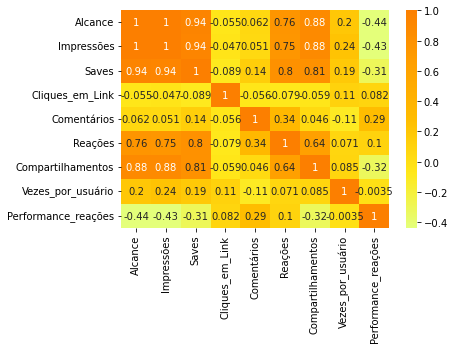

In [140]:
sns.heatmap(df_feed_ig.corr(), annot=True, cmap="Wistia")
plt.show()

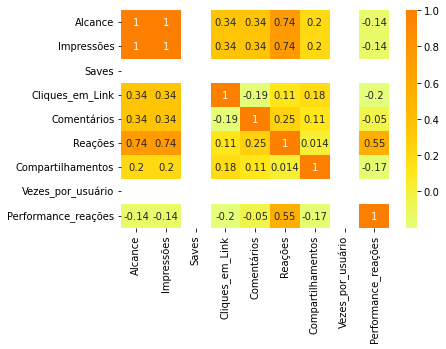

In [141]:
sns.heatmap(df_linkedin.corr(), annot=True, cmap="Wistia")
plt.show()

### Questão 27: Crie uma coluna de nota para cada post. O cálculo da nota fica a seu critério.
#### Resposta: 

As respostas serão atribuidas de acordo com a plataforma e posicionamento de cada post. As categorias serão "Feed e reels do instagram", "Stories" e "LinkedIn". Além disso as notas seão divididas em 2 partes, uma será em relação aos números absolutos (dividido pelo máximo da métrica da categoria) e outra aos números relativos (comparando o engajamento em relação ao alcance/impressões do próprio post)

##### Feed e reels instagram:  
- Alcance/max alcance, Impressoes/max impressoes, Saves/max saves, Comentarios/max comentários, Reações/max reações, Compartilhamentos/max compartilhamentos
- Saves/Alcance, Comentarios/Alcance, Reações/Alcance, Compartilhamentos/Alcance

Obs: foram desconsiderados os cliques em link pois é uma métrica que não faz sentido nesse contexto, visto que nem todos os posts no feed do instagram tem links para serem clicados.

##### Stories: 
- Alcance/max alcance, Impressoes/max impressoes, Comentarios/max comentários, Reações/max reações, Compartilhamentos/max compartilhamentos
- Impressoes/Alcance, Comentários/Alcance, Reações/Alcance, Compartilhamentos/Alcance

Obs: foi desconsiderado o número de saves, pois não tem como salvar stories, e cliques em link, pelo mesmo motivo citado acima.

##### LinkedIn: 
- Impressões/max impressoes, Cliques/max cliques, Comentarios/max comentários, Reações/max reações, Compartilhamentos/max compartilhamentos
- Cliques/Impressoes, Comentarios/Impressoes, Reações/Impressoes, Compartilhamentos/Impressoes

Obs: foram desconsiderados o alcance, pois o linkedin não tem essa métrica (somente impressões), e os saves, pois não tem como salvar um post do LinkedIn.

In [142]:
df_feed_reels_ig = df[(df['Plataforma'] == 'Instagram') & ((df['Posicionamento'] == 'Feed') | (df['Posicionamento'] == 'Reels'))]
df_feed_reels_ig.head(2)

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos,Vezes_por_usuário,Performance_reações,Dia_da_semana
104,DiaDaFamília_Imagem_Feed_Instagram_150521,2021-05-15,DiaDaFamília,Feed,Instagram,Imagem,450,555,1,0,20,45,13,1.233333,0.100000,Saturday
106,DiaDaImunização_Imagem_Feed_Instagram_090621,2021-06-09,DiaDaImunização,Feed,Instagram,Imagem,239,317,0,0,1,32,0,1.326360,0.133891,Wednesday


In [143]:
df_stories.head(2)

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos,Vezes_por_usuário,Performance_reações,Dia_da_semana
1,AulõesFuvest_Imagem_Stories_Instagram_201221,2021-12-20,AulõesFuvest,Stories,Instagram,Imagem,116,119,0,0,0,0,1,1.025862,0.0,Monday
2,BingoDoEstudante_Vídeo_Stories_Instagram_110821,2021-08-11,BingoDoEstudante,Stories,Instagram,Vídeo,93,93,0,0,0,0,0,1.000000,0.0,Wednesday


In [144]:
df_linkedin.head(2)

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos,Vezes_por_usuário,Performance_reações,Dia_da_semana
0,Amostragem_Imagem_Feed_LinkedIn_150721,2021-07-15,Amostragem,Feed,LinkedIn,Imagem,400,400,0,108,0,15,0,1.0,0.037500,Thursday
105,DiaDaFamília_Imagem_Feed_LinkedIn_150521,2021-05-15,DiaDaFamília,Feed,LinkedIn,Imagem,488,488,0,60,1,22,0,1.0,0.045082,Saturday


In [145]:
lst_zeros = [0]*230
df['Notas_posts'] = lst_zeros

df.head()

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos,Vezes_por_usuário,Performance_reações,Dia_da_semana,Notas_posts
0,Amostragem_Imagem_Feed_LinkedIn_150721,2021-07-15,Amostragem,Feed,LinkedIn,Imagem,400,400,0,108,0,15,0,1.000000,0.0375,Thursday,0
1,AulõesFuvest_Imagem_Stories_Instagram_201221,2021-12-20,AulõesFuvest,Stories,Instagram,Imagem,116,119,0,0,0,0,1,1.025862,0.0000,Monday,0
2,BingoDoEstudante_Vídeo_Stories_Instagram_110821,2021-08-11,BingoDoEstudante,Stories,Instagram,Vídeo,93,93,0,0,0,0,0,1.000000,0.0000,Wednesday,0
3,BoaProvaFuvest_Imagem_Stories_Instagram_111221,2021-12-11,BoaProvaFuvest,Stories,Instagram,Imagem,75,75,0,0,0,0,0,1.000000,0.0000,Saturday,0
4,CuriosidadesArcane(1)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(1),Stories,Instagram,Imagem,84,88,0,0,1,0,1,1.047619,0.0000,Friday,0


In [146]:
for linha in range(0, 230):
    if ((df.iloc[linha, 4] == 'Instagram') & ((df.iloc[linha, 3] == 'Feed') | (df.iloc[linha, 3] == 'Reels'))):
        df.iloc[linha, 16] = (df.iloc[linha, 6]/df_feed_reels_ig['Alcance'].max() + df.iloc[linha,7]/df_feed_reels_ig['Impressões'].max() + df.iloc[linha, 8]/df_feed_reels_ig['Saves'].max() + df.iloc[linha,10]/df_feed_reels_ig['Comentários'].max() + df.iloc[linha,11]/df_feed_reels_ig['Reações'].max() + df.iloc[linha,12]/df_feed_reels_ig['Compartilhamentos'].max() + df.iloc[linha,8]/(df.iloc[linha,6]) + df.iloc[linha, 10]/(df.iloc[linha,6]) + df.iloc[linha, 11]/(df.iloc[linha,6]) + df.iloc[linha, 12]/(df.iloc[linha,6]))
        
    elif ((df.iloc[linha, 4] == 'Instagram') & (df.iloc[linha, 3] == 'Stories')):
        df.iloc[linha, 16] = (df.iloc[linha, 6]/df_stories['Alcance'].max() + df.iloc[linha, 7]/df_stories['Impressões'].max() + df.iloc[linha,10]/df_stories['Comentários'].max() + df.iloc[linha,11]/df_stories['Reações'].max() + df.iloc[linha,12]/df_stories['Compartilhamentos'].max() + df.iloc[linha,7]/(df.iloc[linha, 6]) + df.iloc[linha,10]/(df.iloc[linha, 6]) + df.iloc[linha,11]/(df.iloc[linha, 6]) + df.iloc[linha,12]/(df.iloc[linha, 6]))
        
    else:
        df.iloc[linha, 16] = (df.iloc[linha,7]/df_linkedin['Impressões'].max() + df.iloc[linha,9]/df_linkedin['Cliques_em_Link'].max() + df.iloc[linha,10]/df_linkedin['Comentários'].max() + df.iloc[linha,11]/df_linkedin['Reações'].max() + df.iloc[linha,12]/df_linkedin['Compartilhamentos'].max() + df.iloc[linha,9]/(df.iloc[linha,7]) + df.iloc[linha,10]/(df.iloc[linha,7]) +  df.iloc[linha,11]/(df.iloc[linha,7]) + df.iloc[linha,12]/(df.iloc[linha,7]))
        
df.head()

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos,Vezes_por_usuário,Performance_reações,Dia_da_semana,Notas_posts
0,Amostragem_Imagem_Feed_LinkedIn_150721,2021-07-15,Amostragem,Feed,LinkedIn,Imagem,400,400,0,108,0,15,0,1.000000,0.0375,Thursday,2.471925
1,AulõesFuvest_Imagem_Stories_Instagram_201221,2021-12-20,AulõesFuvest,Stories,Instagram,Imagem,116,119,0,0,0,0,1,1.025862,0.0000,Monday,2.761641
2,BingoDoEstudante_Vídeo_Stories_Instagram_110821,2021-08-11,BingoDoEstudante,Stories,Instagram,Vídeo,93,93,0,0,0,0,0,1.000000,0.0000,Wednesday,1.971445
3,BoaProvaFuvest_Imagem_Stories_Instagram_111221,2021-12-11,BoaProvaFuvest,Stories,Instagram,Imagem,75,75,0,0,0,0,0,1.000000,0.0000,Saturday,1.783423
4,CuriosidadesArcane(1)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(1),Stories,Instagram,Imagem,84,88,0,0,1,0,1,1.047619,0.0000,Friday,2.802815


In [2]:
'''for linha in df.index.array:
    if ((df.iloc[linha, 4] == 'Instagram') & ((df.iloc[linha, 3] == 'Feed') | (df.iloc[linha, 3] == 'Reels'))):
        df.iloc[linha, 16] = (df.iloc[linha, 6]/df_feed_reels_ig['Alcance'].max() + df.iloc[linha,7]/df_feed_reels_ig['Impressões'].max() + df.iloc[linha, 8]/df_feed_reels_ig['Saves'].max() + df.iloc[linha,10]/df_feed_reels_ig['Comentários'].max() + df.iloc[linha,11]/df_feed_reels_ig['Reações'].max() + df.iloc[linha,12]/df_feed_reels_ig['Compartilhamentos'].max() + df.iloc[linha,8]/(df.iloc[linha,6]) + df.iloc[linha, 10]/(df.iloc[linha,6]) + df.iloc[linha, 11]/(df.iloc[linha,6]) + df.iloc[linha, 12]/(df.iloc[linha,6]))
        
    elif ((df.iloc[linha, 4] == 'Instagram') & (df.iloc[linha, 3] == 'Stories')):
        df.iloc[linha, 16] = (df.iloc[linha, 6]/df_stories['Alcance'].max() + df.iloc[linha, 7]/df_stories['Impressões'].max() + df.iloc[linha,10]/df_stories['Comentários'].max() + df.iloc[linha,11]/df_stories['Reações'].max() + df.iloc[linha,12]/df_stories['Compartilhamentos'].max() + df.iloc[linha,7]/(df.iloc[linha, 6]) + df.iloc[linha,10]/(df.iloc[linha, 6]) + df.iloc[linha,11]/(df.iloc[linha, 6]) + df.iloc[linha,12]/(df.iloc[linha, 6]))
        
    else:
        df.iloc[linha, 16] = (df.iloc[linha,7]/df_linkedin['Impressões'].max() + df.iloc[linha,9]/df_linkedin['Cliques_em_Link'].max() + df.iloc[linha,10]/df_linkedin['Comentários'].max() + df.iloc[linha,11]/df_linkedin['Reações'].max() + df.iloc[linha,12]/df_linkedin['Compartilhamentos'].max() + df.iloc[linha,9]/(df.iloc[linha,7]) + df.iloc[linha,10]/(df.iloc[linha,7]) +  df.iloc[linha,11]/(df.iloc[linha,7]) + df.iloc[linha,12]/(df.iloc[linha,7]))
        
df.head()'''

"for linha in df.index.array:\n    if ((df.iloc[linha, 4] == 'Instagram') & ((df.iloc[linha, 3] == 'Feed') | (df.iloc[linha, 3] == 'Reels'))):\n        df.iloc[linha, 16] = (df.iloc[linha, 6]/df_feed_reels_ig['Alcance'].max() + df.iloc[linha,7]/df_feed_reels_ig['Impressões'].max() + df.iloc[linha, 8]/df_feed_reels_ig['Saves'].max() + df.iloc[linha,10]/df_feed_reels_ig['Comentários'].max() + df.iloc[linha,11]/df_feed_reels_ig['Reações'].max() + df.iloc[linha,12]/df_feed_reels_ig['Compartilhamentos'].max() + df.iloc[linha,8]/(df.iloc[linha,6]) + df.iloc[linha, 10]/(df.iloc[linha,6]) + df.iloc[linha, 11]/(df.iloc[linha,6]) + df.iloc[linha, 12]/(df.iloc[linha,6]))\n        \n    elif ((df.iloc[linha, 4] == 'Instagram') & (df.iloc[linha, 3] == 'Stories')):\n        df.iloc[linha, 16] = (df.iloc[linha, 6]/df_stories['Alcance'].max() + df.iloc[linha, 7]/df_stories['Impressões'].max() + df.iloc[linha,10]/df_stories['Comentários'].max() + df.iloc[linha,11]/df_stories['Reações'].max() + df.iloc[

In [147]:
df['Notas_posts'].describe()

count    230.000000
mean       1.856517
std        0.765954
min        0.312246
25%        1.621577
50%        1.991465
75%        2.266833
max        5.141141
Name: Notas_posts, dtype: float64

### Questão 28: Tivemos uma melhora ou piora de performance após a divulgação da nova identidade visual? Quais hipóteses você levanta pra isso?
#### Resposta: Tivemos uma melhora após a divulgação da nova identidade, provavelmente porque os membros do marketing estão mais dedicados, a IME Jr ganhou mais seguidores e a nova identidade dá outra "cara" para a EJ, incentivando o engajamento.

In [148]:
df[(df['Criativo'] == 'IdentidadeNova') | (df['Criativo'] == 'IdentidadeVisual') ]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos,Vezes_por_usuário,Performance_reações,Dia_da_semana,Notas_posts
173,IdentidadeNova_Imagem_Feed_LinkedIn_060921,2021-09-06,IdentidadeNova,Feed,LinkedIn,Imagem,371,371,0,21,4,14,0,1.000000,0.037736,Monday,2.402507
174,IdentidadeVisual_Imagem_Feed_Instagram_060921,2021-09-06,IdentidadeVisual,Feed,Instagram,Imagem,412,501,1,0,11,69,0,1.216019,0.167476,Monday,0.711255


In [149]:
# Média das notas dos posts antes da divulgação da nova identidade visual
df.loc[df['Data'] < '2021-09-06', 'Notas_posts'].mean()

1.84148096566522

In [150]:
# Média das notas dos posts depois da divulgação da nova identidade visual
df.loc[(df['Data'] > '2021-09-06'), 'Notas_posts'].mean()

1.9088582319348557

### Questão 29:  Perdemos muito engajamento com posts sequenciais?
#### Resposta: Não, pois a média de notas dos posts sequenciais é maior que a de posts não sequenciais.

In [151]:
df.loc[df['Criativo'].str.endswith(')'), 'Notas_posts'].mean()

2.074534647496857

In [152]:
df.loc[~df['Criativo'].str.endswith(')'), 'Notas_posts'].mean()

1.455470866288599

### Questão 30: Qual post deveríamos repetir?
#### Resposta: Deveríamos repetir posts divulgando o trabalho da ej, de dia do desafio e ejotinha do mês.

In [153]:
# Post com nota máxima
df.loc[[df['Notas_posts'].idxmax()]]

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos,Vezes_por_usuário,Performance_reações,Dia_da_semana,Notas_posts
214,SemanaPreFuvest_Imagem_Feed_Instagram_060121,2022-01-06,SemanaPreFuvest,Feed,Instagram,Imagem,6058,8849,81,0,25,196,200,1.460713,0.032354,Thursday,5.141141


In [154]:
# Como o post com nota máxima é um post que foi impulsionado cabe analisar os outros 5 melhores posts
# Posts com as 6 melhores notas
df.nlargest(5, 'Notas_posts')

,Nome_do_Post,Data,Criativo,Posicionamento,Plataforma,Formato,Alcance,Impressões,Saves,Cliques_em_Link,Comentários,Reações,Compartilhamentos,Vezes_por_usuário,Performance_reações,Dia_da_semana,Notas_posts
214,SemanaPreFuvest_Imagem_Feed_Instagram_060121,2022-01-06,SemanaPreFuvest,Feed,Instagram,Imagem,6058,8849,81,0,25,196,200,1.460713,0.032354,Thursday,5.141141
120,DiaDoDesafio(1)_Imagem_Stories_Instagram_260521,2021-05-26,DiaDoDesafio(1),Stories,Instagram,Imagem,189,194,0,0,0,0,2,1.026455,0.000000,Wednesday,4.037037
155,EjotinhaNovembro_Imagem_Stories_Instagram_271221,2021-12-27,EjotinhaNovembro,Stories,Instagram,Imagem,145,145,0,0,2,0,1,1.000000,0.000000,Monday,3.701975
109,DiaDaPizza(2)_Vídeo_Stories_Instagram_100721,2021-07-10,DiaDaPizza(2),Stories,Instagram,Vídeo,70,70,0,0,0,38,0,1.000000,0.542857,Saturday,3.274052
226,Vale-PresenteResultado(6)_Imagem_Stories_Insta...,2021-11-11,Vale-PresenteResultado(6),Stories,Instagram,Imagem,89,90,0,0,2,0,1,1.011236,0.000000,Thursday,3.146427


### Questão 31: Qual formato a gente deve priorizar?
#### Resposta: Em tese deveríamos priorizar vídeo, pois sua média de notas é maior. Porém um feed com muitos vídeos não é tão agradável, então devemos postar imagens normalmente e aumentar um pouco o número de vídeos.

In [155]:
df.loc[df['Formato'] == 'Imagem', 'Notas_posts'].mean()

1.810179391823007

In [156]:
df.loc[df['Formato'] == 'Vídeo', 'Notas_posts'].mean()

1.990815705841933

### Questão 32: Compare nossa performance com outra EJ
#### Resposta: 

### Questão 33: Como tomador(a) de decisão, quais seriam suas estratégias pro time de Marketing?
#### Resposta: Como tomadora de decisões, eu focaria em mais posts que envolvam interação com o público (como os stories de dia do desafio e o post de sorteio), e posts que divulguem o trabalho da ej (como o da semana pré fuvest, pois mesmo que não fosse impulsionado provavelmente seria um bom post). Dessa forma, os seguidores iriam ajudar na divulgação da nossa conta, através de curtidas/comentários/compartilhamentos, e mais pessoas/empresas conheceriam a IME Jr pelas redes sociais. Assim, poderíamos usar o Instagram e o LinkedIn a fim de ficarmos mais conhecidos nas áreas de estatística, análise de dados, educação e computação, o que, consequentemente, traria mais projetos à empresa e nos ajudaria a desenvolver profissionalmente os ejotinhas.